In [35]:
import numpy as np
import math
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [36]:
a1 = np.arange(0,3,0.001)
a2 = np.arange(1,10,0.001)
b1 = np.arange(0,5,0.001)
d1 = np.arange(0,5,0.001)


In [37]:
coeff = [a1,a2,b1,d1]

In [38]:
coeffs = pd.DataFrame(coeff)
coeffs.index=['a1','a2','b1','d1']
coeffs = coeffs.loc[:,coeffs.notna().all(axis=0)]
coeffs = coeffs.T
coeffs

a1     a2     b1     d1
0     0.000  1.000  0.000  0.000
1     0.001  1.001  0.001  0.001
2     0.002  1.002  0.002  0.002
3     0.003  1.003  0.003  0.003
4     0.004  1.004  0.004  0.004
...     ...    ...    ...    ...
2995  2.995  3.995  2.995  2.995
2996  2.996  3.996  2.996  2.996
2997  2.997  3.997  2.997  2.997
2998  2.998  3.998  2.998  2.998
2999  2.999  3.999  2.999  2.999

[3000 rows x 4 columns]

In [39]:
coeffs['a1'] = np.random.permutation(coeffs['a1'])
coeffs['a2'] = np.random.permutation(coeffs['a2'])
coeffs['b1'] = np.random.permutation(coeffs['b1'])
coeffs['d1'] = np.random.permutation(coeffs['d1'])

In [40]:
coeffs

a1     a2     b1     d1
0     1.492  1.777  0.241  1.618
1     0.250  1.039  0.589  1.124
2     0.571  2.580  0.709  0.165
3     1.557  1.259  1.183  0.838
4     2.018  3.953  0.006  2.546
...     ...    ...    ...    ...
2995  1.829  3.320  1.858  0.596
2996  0.981  2.093  0.504  2.757
2997  1.342  1.795  0.680  0.820
2998  0.016  2.754  1.575  0.526
2999  0.835  3.134  0.369  1.916

[3000 rows x 4 columns]

In [41]:
coeffs.iloc[0]['a1']

1.492

In [42]:
coeffs.shape[0]

3000

In [43]:
X=[]
for i in range(coeffs.shape[0]):
  poly = [coeffs.iloc[i]['a2'],- coeffs.iloc[i]['a2'],coeffs.iloc[i]['a1']*coeffs.iloc[i]['a1']-coeffs.iloc[i]['a1']*coeffs.iloc[i]['d1']*coeffs.iloc[i]['b1'],-coeffs.iloc[i]['a1']*coeffs.iloc[i]['d1']]
  root=np.roots(poly)
  X.append(root)

# coeffs.shape

In [44]:
X = pd.DataFrame(X)
X.columns = ['x1','x2','x3']
X

x1                  x2                  x3
0     1.185804+0.000000j -0.092902+1.066305j -0.092902-1.066305j
1     1.251794+0.000000j -0.125897+0.447439j -0.125897-0.447439j
2     0.934286+0.000000j  0.032857+0.194952j  0.032857-0.194952j
3     1.163956+0.000000j -0.081978+0.940026j -0.081978-0.940026j
4     1.121619+0.000000j -0.060809+1.074756j -0.060809-1.074756j
...                  ...                 ...                 ...
2995  0.946489+0.000000j  0.026756+0.588376j  0.026756-0.588376j
2996  1.614409+0.000000j -0.307205+0.840270j -0.307205-0.840270j
2997  1.016434+0.000000j -0.008217+0.776582j -0.008217-0.776582j
2998  1.007694+0.000000j -0.003847+0.054934j -0.003847-0.054934j
2999  1.283369+0.000000j -0.141685+0.614569j -0.141685-0.614569j

[3000 rows x 3 columns]

In [49]:
import plotly.graph_objects as go
import numpy as np

# Assuming you have already defined coeffs and X

# Create a figure
fig = go.Figure()

# Plot the roots
for i in range(len(X)):
    poly = [coeffs.iloc[i]['a2'], -coeffs.iloc[i]['a2'], coeffs.iloc[i]['a1']*coeffs.iloc[i]['a1']-coeffs.iloc[i]['a1']*coeffs.iloc[i]['d1']*coeffs.iloc[i]['b1'], -coeffs.iloc[i]['a1']*coeffs.iloc[i]['d1']]
    roots = np.roots(poly)
    fig.add_trace(go.Scatter(x=np.real(roots), y=np.imag(roots), mode='markers', marker=dict(size=2), name=f'Roots {i+1}'))

# Add layout details
fig.update_layout(title='Roots of Polynomial',
                  xaxis_title='Real Part',
                  yaxis_title='Imaginary Part',
                  showlegend=True)

# Show the plot
fig.show()


In [47]:
import plotly.graph_objects as go
import numpy as np

# Assuming you have already defined coeffs and X

# Create a figure
fig = go.Figure()

# Plot all roots with the same color
all_roots = []
for i in range(len(X)):
    poly = [coeffs.iloc[i]['a2'], -coeffs.iloc[i]['a2'], coeffs.iloc[i]['a1']*coeffs.iloc[i]['a1']-coeffs.iloc[i]['a1']*coeffs.iloc[i]['d1']*coeffs.iloc[i]['b1'], -coeffs.iloc[i]['a1']*coeffs.iloc[i]['d1']]
    roots = np.roots(poly)
    all_roots.extend(roots)

fig.add_trace(go.Scatter(x=np.real(all_roots), y=np.imag(all_roots), mode='markers', marker=dict(size=2, color='blue'), name='All Roots'))

# Add layout details
fig.update_layout(title='Roots of Polynomial',
                  xaxis_title='Real Part',
                  yaxis_title='Imaginary Part',
                  showlegend=True)

# Show the plot
fig.show()


In [ ]:

  # def mappingg(x1):
  # import numpy as np
  # return np.real(x1)==x1

In [ ]:
xx1=[]
for i in range(X.shape[0]):
  if np.real(X['x1'].iloc[i])==X['x1'].iloc[i]:
    xx1.append(np.real(X['x1'].iloc[i]))
  else:
    xx1.append(-5)

In [ ]:
xx1 = pd.DataFrame(xx1)
xx1.columns = ['x1']
xx1

x1
0      1.222797
1      1.594063
2      2.151930
3      1.125625
4     -5.000000
...         ...
29995  2.252984
29996  2.633175
29997  2.387089
29998 -5.000000
29999  1.267803

[30000 rows x 1 columns]

In [ ]:
xx2=[]
for i in range(X.shape[0]):
  if np.real(X['x2'].iloc[i])==X['x2'].iloc[i]:
    xx2.append(np.real(X['x2'].iloc[i]))
  else:
    xx2.append(-5)

In [ ]:
xx2 = pd.DataFrame(xx2)
xx2.columns = ['x2']
xx2

x2
0     -5.0
1     -5.0
2     -5.0
3     -5.0
4     -5.0
...    ...
29995 -5.0
29996 -5.0
29997 -5.0
29998 -5.0
29999 -5.0

[30000 rows x 1 columns]

In [ ]:
xx3=[]
for i in range(X.shape[0]):
  if np.real(X['x3'].iloc[i])==X['x3'].iloc[i]:
    xx3.append(np.real(X['x3'].iloc[i]))
  else:
    xx3.append(-5)

In [ ]:
xx3 = pd.DataFrame(xx3)
xx3.columns = ['x3']
xx3

x3
0     -5.000000
1     -5.000000
2     -5.000000
3     -5.000000
4      0.287247
...         ...
29995 -5.000000
29996 -5.000000
29997 -5.000000
29998  0.924926
29999 -5.000000

[30000 rows x 1 columns]

In [ ]:
XX = pd.concat([xx1,xx2,xx3],axis = 1, join = 'inner')
XX

x1   x2        x3
0      1.222797 -5.0 -5.000000
1      1.594063 -5.0 -5.000000
2      2.151930 -5.0 -5.000000
3      1.125625 -5.0 -5.000000
4     -5.000000 -5.0  0.287247
...         ...  ...       ...
29995  2.252984 -5.0 -5.000000
29996  2.633175 -5.0 -5.000000
29997  2.387089 -5.0 -5.000000
29998 -5.000000 -5.0  0.924926
29999  1.267803 -5.0 -5.000000

[30000 rows x 3 columns]

In [ ]:
XXcoeffs = pd.concat([coeffs,XX], axis = 1, join = 'inner')
XXcoeffs

a1      a2      b1      d1        x1   x2        x3
0      0.9992  3.3947  0.0140  2.3140  1.222797 -5.0 -5.000000
1      0.9747  3.4093  2.0920  1.5765  1.594063 -5.0 -5.000000
2      2.5412  1.9084  1.8483  1.9035  2.151930 -5.0 -5.000000
3      2.9641  3.6442  0.9868  1.6734  1.125625 -5.0 -5.000000
4      2.3638  1.4812  1.7333  0.4287 -5.000000 -5.0  0.287247
...       ...     ...     ...     ...       ...  ...       ...
29995  2.2511  2.4405  2.5442  1.7776  2.252984 -5.0 -5.000000
29996  1.9482  1.9561  2.7224  2.0199  2.633175 -5.0 -5.000000
29997  0.9198  1.3731  2.2864  2.1671  2.387089 -5.0 -5.000000
29998  2.2679  2.5742  0.4137  1.4644 -5.000000 -5.0  0.924926
29999  1.9360  1.4206  1.1754  1.1125  1.267803 -5.0 -5.000000

[30000 rows x 7 columns]

In [ ]:
# XX1 = xx1.dropna()
# XX1 = XX1.reset_index(drop=True)
# XX1

In [ ]:
# XX2 = xx2.dropna()
# XX2 = XX2.reset_index(drop=True)
# XX2

In [ ]:
# XX3 = xx3.dropna()
# XX3 = XX3.reset_index(drop=True)
# XX3

In [ ]:
# Y1=[]
# Y2=[]
# Y3=[]
# for i in range(len(XX1)):
#   x1 = XX1.iloc[i]['x1']
# for i in range(len(XX2)):
#   x2 = XX2.iloc[i]['x2']
# for i in range(len(XX3)):
#   x3 = XX3.iloc[i]['x3']

#   a1 = coeffs.iloc[i]['a1']
#   b1 = coeffs.iloc[i]['b1']
#   y1=(1/a1)*(1-x1)*(1+b1*x1)
#   y2=(1/a1)*(1-x2)*(1+b1*x2)
#   y3=(1/a1)*(1-x3)*(1+b1*x3)

#   Y1.append(y1)
#   Y2.append(y2)
#   Y3.append(y3)

In [ ]:
Y1=[]
for i in range(len(XXcoeffs)):
  x1 = XXcoeffs.iloc[i]['x1']
  a1 = XXcoeffs.iloc[i]['a1']
  b1 = XXcoeffs.iloc[i]['b1']
  y1=(1/a1)*(1-x1)*(1+b1*x1)
  if (XXcoeffs['x1'].iloc[i])==-5:
    Y1.append(-5)
  else:
    Y1.append(y1)

<ipython-input-227-c78327688e70>:6: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-227-c78327688e70>:6: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
Y1 = pd.DataFrame(Y1)
Y1.columns = ['y1']
Y1

y1
0     -0.226793
1     -2.641975
2     -2.256269
3     -0.089459
4     -5.000000
...         ...
29995 -3.747121
29996 -6.847694
29997 -9.738640
29998 -5.000000
29999 -0.344461

[30000 rows x 1 columns]

In [ ]:
Y2=[]
for i in range(len(XXcoeffs)):
  x2 = XXcoeffs.iloc[i]['x2']
  a1 = XXcoeffs.iloc[i]['a1']
  b1 = XXcoeffs.iloc[i]['b1']
  y2=(1/a1)*(1-x2)*(1+b1*x2)
  if (XXcoeffs['x2'].iloc[i])==-5:
    Y2.append(-5)
  else:
    Y2.append(y2)

<ipython-input-229-2ba802e1299e>:6: RuntimeWarning:

divide by zero encountered in double_scalars



In [ ]:
Y2 = pd.DataFrame(Y2)
Y2.columns = ['y2']
Y2

y2
0     -5.0
1     -5.0
2     -5.0
3     -5.0
4     -5.0
...    ...
29995 -5.0
29996 -5.0
29997 -5.0
29998 -5.0
29999 -5.0

[30000 rows x 1 columns]

In [ ]:
Y3=[]
for i in range(len(XXcoeffs)):
  x3 = XXcoeffs.iloc[i]['x3']
  a1 = XXcoeffs.iloc[i]['a1']
  b1 = XXcoeffs.iloc[i]['b1']
  y3=(1/a1)*(1-x3)*(1+b1*x3)
  if (XXcoeffs['x3'].iloc[i])==-5:
    Y3.append(-5)
  else:
    Y3.append(y3)

<ipython-input-231-08a25004e81c>:6: RuntimeWarning:

divide by zero encountered in double_scalars



In [ ]:
Y3 = pd.DataFrame(Y3)
Y3.columns = ['y3']
Y3

y3
0     -5.000000
1     -5.000000
2     -5.000000
3     -5.000000
4      0.451655
...         ...
29995 -5.000000
29996 -5.000000
29997 -5.000000
29998  0.045769
29999 -5.000000

[30000 rows x 1 columns]

In [ ]:
XYcoeffs = pd.concat([XXcoeffs,Y1,Y2,Y3],axis = 1, join = 'inner')
XYcoeffs

a1      a2      b1      d1        x1   x2        x3        y1   y2  \
0      0.9992  3.3947  0.0140  2.3140  1.222797 -5.0 -5.000000 -0.226793 -5.0   
1      0.9747  3.4093  2.0920  1.5765  1.594063 -5.0 -5.000000 -2.641975 -5.0   
2      2.5412  1.9084  1.8483  1.9035  2.151930 -5.0 -5.000000 -2.256269 -5.0   
3      2.9641  3.6442  0.9868  1.6734  1.125625 -5.0 -5.000000 -0.089459 -5.0   
4      2.3638  1.4812  1.7333  0.4287 -5.000000 -5.0  0.287247 -5.000000 -5.0   
...       ...     ...     ...     ...       ...  ...       ...       ...  ...   
29995  2.2511  2.4405  2.5442  1.7776  2.252984 -5.0 -5.000000 -3.747121 -5.0   
29996  1.9482  1.9561  2.7224  2.0199  2.633175 -5.0 -5.000000 -6.847694 -5.0   
29997  0.9198  1.3731  2.2864  2.1671  2.387089 -5.0 -5.000000 -9.738640 -5.0   
29998  2.2679  2.5742  0.4137  1.4644 -5.000000 -5.0  0.924926 -5.000000 -5.0   
29999  1.9360  1.4206  1.1754  1.1125  1.267803 -5.0 -5.000000 -0.344461 -5.0   

             y3  
0     -5.000000  
1     -5.000000  
2     -5.000000  
3     -5.000000  
4      0.451655  
...         ...  
29995 -5.000000  
29996 -5.000000  
29997 -5.000000  
29998  0.045769  
29999 -5.000000  

[30000 rows x 10 columns]

In [ ]:
# X2Y2 = pd.concat([XX2,Y2],axis = 1, join = 'inner')
# X2Y2

In [ ]:
# X3Y3 = pd.concat([XX3,Y3],axis = 1, join = 'inner')
# X3Y3

In [ ]:
X1Y1coeffs = pd.concat([coeffs,xx1,Y1],axis = 1, join = 'inner')
X1Y1coeffs

a1      a2      b1      d1        x1        y1
0      0.9992  3.3947  0.0140  2.3140  1.222797 -0.226793
1      0.9747  3.4093  2.0920  1.5765  1.594063 -2.641975
2      2.5412  1.9084  1.8483  1.9035  2.151930 -2.256269
3      2.9641  3.6442  0.9868  1.6734  1.125625 -0.089459
4      2.3638  1.4812  1.7333  0.4287 -5.000000 -5.000000
...       ...     ...     ...     ...       ...       ...
29995  2.2511  2.4405  2.5442  1.7776  2.252984 -3.747121
29996  1.9482  1.9561  2.7224  2.0199  2.633175 -6.847694
29997  0.9198  1.3731  2.2864  2.1671  2.387089 -9.738640
29998  2.2679  2.5742  0.4137  1.4644 -5.000000 -5.000000
29999  1.9360  1.4206  1.1754  1.1125  1.267803 -0.344461

[30000 rows x 6 columns]

In [ ]:
X2Y2coeffs = pd.concat([coeffs,xx2,Y2],axis = 1, join = 'inner')
X2Y2coeffs

a1      a2      b1      d1   x2   y2
0      0.9992  3.3947  0.0140  2.3140 -5.0 -5.0
1      0.9747  3.4093  2.0920  1.5765 -5.0 -5.0
2      2.5412  1.9084  1.8483  1.9035 -5.0 -5.0
3      2.9641  3.6442  0.9868  1.6734 -5.0 -5.0
4      2.3638  1.4812  1.7333  0.4287 -5.0 -5.0
...       ...     ...     ...     ...  ...  ...
29995  2.2511  2.4405  2.5442  1.7776 -5.0 -5.0
29996  1.9482  1.9561  2.7224  2.0199 -5.0 -5.0
29997  0.9198  1.3731  2.2864  2.1671 -5.0 -5.0
29998  2.2679  2.5742  0.4137  1.4644 -5.0 -5.0
29999  1.9360  1.4206  1.1754  1.1125 -5.0 -5.0

[30000 rows x 6 columns]

In [ ]:
X3Y3coeffs = pd.concat([coeffs,xx3,Y3],axis = 1, join = 'inner')
X3Y3coeffs

a1      a2      b1      d1        x3        y3
0      0.9992  3.3947  0.0140  2.3140 -5.000000 -5.000000
1      0.9747  3.4093  2.0920  1.5765 -5.000000 -5.000000
2      2.5412  1.9084  1.8483  1.9035 -5.000000 -5.000000
3      2.9641  3.6442  0.9868  1.6734 -5.000000 -5.000000
4      2.3638  1.4812  1.7333  0.4287  0.287247  0.451655
...       ...     ...     ...     ...       ...       ...
29995  2.2511  2.4405  2.5442  1.7776 -5.000000 -5.000000
29996  1.9482  1.9561  2.7224  2.0199 -5.000000 -5.000000
29997  0.9198  1.3731  2.2864  2.1671 -5.000000 -5.000000
29998  2.2679  2.5742  0.4137  1.4644  0.924926  0.045769
29999  1.9360  1.4206  1.1754  1.1125 -5.000000 -5.000000

[30000 rows x 6 columns]

In [ ]:
X1Y1coeffs[X1Y1coeffs.x1 > 0]

a1      a2      b1      d1        x1        y1
0      0.9992  3.3947  0.0140  2.3140  1.222797 -0.226793
1      0.9747  3.4093  2.0920  1.5765  1.594063 -2.641975
2      2.5412  1.9084  1.8483  1.9035  2.151930 -2.256269
3      2.9641  3.6442  0.9868  1.6734  1.125625 -0.089459
6      0.0557  3.5590  2.1649  1.1922  1.054274 -3.198380
...       ...     ...     ...     ...       ...       ...
29994  2.1045  3.6378  2.1730  1.5783  1.741350 -1.685238
29995  2.2511  2.4405  2.5442  1.7776  2.252984 -3.747121
29996  1.9482  1.9561  2.7224  2.0199  2.633175 -6.847694
29997  0.9198  1.3731  2.2864  2.1671  2.387089 -9.738640
29999  1.9360  1.4206  1.1754  1.1125  1.267803 -0.344461

[24045 rows x 6 columns]

In [ ]:
X1Y1coeffs_pos = X1Y1coeffs[X1Y1coeffs.x1 > 0]
X1Y1coeffs_pos = X1Y1coeffs.loc[X1Y1coeffs['y1'] > 0]
X1Y1coeffs_pos = X1Y1coeffs_pos.reset_index(drop=True)
X1Y1coeffs_pos

a1      a2      b1      d1        x1        y1
0     2.2424  3.3550  2.7559  0.5815  0.971569  0.046627
1     0.8654  1.8563  0.1228  0.7192  0.979586  0.026427
2     0.6202  2.2776  0.8543  0.1736  0.916059  0.241265
3     2.5469  1.9355  2.6887  0.6887  0.995517  0.006471
4     0.4858  1.6818  1.6640  0.0871  0.922849  0.402687
...      ...     ...     ...     ...       ...       ...
1754  0.6434  1.9252  2.9799  0.0173  0.744881  1.276653
1755  0.6743  2.9265  2.5171  0.0382  0.856462  0.671775
1756  0.6388  3.8312  2.4288  0.0573  0.920796  0.401280
1757  0.9640  3.6886  0.4755  0.2539  0.830874  0.244756
1758  1.0165  1.7316  2.5863  0.2694  0.973989  0.090046

[1759 rows x 6 columns]

In [ ]:
X2Y2coeffs_pos = X2Y2coeffs[X2Y2coeffs.x2 > 0]
X2Y2coeffs_pos = X2Y2coeffs.loc[X2Y2coeffs['y2'] > 0]
X2Y2coeffs_pos = X2Y2coeffs_pos.reset_index(drop=True)
X2Y2coeffs_pos

a1      a2      b1      d1        x2        y2
0   0.0000  3.0884  2.3445  1.0280  0.000000       inf
1   0.7599  3.7721  1.7556  0.0037  0.180056  1.420099
2   1.0336  3.9867  1.4423  0.0480  0.294493  0.972493
3   0.4160  1.2877  1.7170  0.0023  0.150994  2.569992
4   1.0041  3.8353  1.7332  0.0343  0.326169  1.050452
5   0.1698  1.2283  2.3482  0.0008  0.016995  6.020226
6   1.2067  3.8801  1.7846  0.1038  0.301578  0.890288
7   0.5878  1.5896  2.2209  0.0024  0.306319  1.982979
8   1.0049  3.5925  1.0276  0.0683  0.237093  0.944153
9   0.8350  3.0623  0.1952  0.0124  0.316529  0.869102
10  0.3388  1.2719  2.7811  0.0048  0.075431  3.301433
11  0.1575  2.4137  1.7539  0.0000  0.010385  6.397715
12  0.9545  3.7679  1.4744  0.0103  0.361171  1.025681
13  0.6440  3.3167  2.0395  0.0061  0.130624  1.709603
14  0.7820  3.6972  1.4040  0.0305  0.109172  1.313775
15  0.6730  2.7693  1.3371  0.0226  0.132061  1.517383
16  0.7817  2.4796  0.5942  0.0303  0.296342  1.058670
17  0.6580  3.3116  2.8275  0.0130  0.113609  1.779826
18  0.8419  2.9850  2.1888  0.0224  0.278504  1.379395
19  0.5713  1.2138  2.7455  0.0225  0.281306  2.229581
20  0.9495  3.2473  1.1489  0.0579  0.262901  1.010782
21  0.9783  3.5717  0.0367  0.0773  0.214368  0.809376
22  0.6921  2.9016  1.2315  0.0081  0.187596  1.445007
23  0.1550  1.3606  1.8639  0.0002  0.016507  6.540341
24  0.8645  3.9633  1.3466  0.0395  0.117116  1.182328
25  0.5844  1.1349  1.4699  0.0330  0.349377  1.685061
26  0.9786  2.8842  1.9799  0.0694  0.277976  1.143880
27  0.6583  2.9264  2.0620  0.0119  0.145222  1.687285
28  0.8725  3.3338  1.9597  0.0312  0.229329  1.280255
29  0.8685  3.0841  1.2185  0.0184  0.335065  1.078195
30  1.0709  3.5447  2.9489  0.0587  0.310668  1.233401
31  0.7051  3.7920  0.6034  0.0233  0.083878  1.365038
32  0.6043  2.7903  2.2428  0.0129  0.112376  1.839050
33  0.6434  1.9252  2.9799  0.0173  0.219807  2.006872

In [ ]:
X3Y3coeffs_pos = X3Y3coeffs[X3Y3coeffs.x3 > 0]
X3Y3coeffs_pos = X3Y3coeffs.loc[X3Y3coeffs['y3'] > 0]
X3Y3coeffs_pos = X3Y3coeffs_pos.reset_index(drop=True)
X3Y3coeffs_pos

a1      a2      b1      d1        x3        y3
0     2.3638  1.4812  1.7333  0.4287  0.287247  0.451655
1     2.1879  2.5178  2.0596  0.4539  0.469677  0.476863
2     2.7203  1.8829  2.4231  0.5350  0.426414  0.428717
3     2.5322  2.9788  0.8329  0.7020  0.422783  0.308220
4     2.8799  3.5024  2.1300  0.3958  0.216194  0.397494
...      ...     ...     ...     ...       ...       ...
5230  2.2665  3.4623  0.1140  1.0447  0.587807  0.194050
5231  2.2650  3.1386  1.0326  0.4424  0.290568  0.407192
5232  2.6593  2.4755  0.8686  0.4489  0.212379  0.350812
5233  1.7898  1.1519  0.2937  0.3261  0.205217  0.470827
5234  2.2679  2.5742  0.4137  1.4644  0.924926  0.045769

[5235 rows x 6 columns]

In [ ]:
# X3Y3_pos = X3Y3.loc[X3Y3['x3'] > 0]
# X3Y3_pos = X3Y3.loc[X3Y3['y3'] > 0]
# X3Y3_pos = X3Y3_pos.reset_index(drop=True)
# X3Y3_pos

In [ ]:
A1 = []
for i in range(X1Y1coeffs_pos.shape[0]):
  a1 = X1Y1coeffs_pos.iloc[i]['a1']
  a2 = X1Y1coeffs_pos.iloc[i]['a2']
  b1 = X1Y1coeffs_pos.iloc[i]['b1']
  d1 = X1Y1coeffs_pos.iloc[i]['d1']
  x1 = X1Y1coeffs_pos.iloc[i]['x1']
  y1 = X1Y1coeffs_pos.iloc[i]['y1']
  a_1 = 1-2*x1 - (a1+a2*x1*x1)*y1/((1+b1*x1)*(1+b1*x1))
  AA1=[a1,a2,b1,d1,x1,y1,a_1]
  A1.append(AA1)

In [ ]:
A1 = pd.DataFrame(A1)
A1.columns = (['a1','a2','b1','d1','x1','y1','A1'])
A1

a1      a2      b1      d1        x1        y1        A1
0     2.2424  3.3550  2.7559  0.5815  0.971569  0.046627 -0.961788
1     0.8654  1.8563  0.1228  0.7192  0.979586  0.026427 -1.014901
2     0.6202  2.2776  0.8543  0.1736  0.916059  0.241265 -1.024323
3     2.5469  1.9355  2.6887  0.6887  0.995517  0.006471 -0.993172
4     0.4858  1.6818  1.6640  0.0871  0.922849  0.402687 -0.965834
...      ...     ...     ...     ...       ...       ...       ...
1754  0.6434  1.9252  2.9799  0.0173  0.744881  1.276653 -0.700553
1755  0.6743  2.9265  2.5171  0.0382  0.856462  0.671775 -0.903208
1756  0.6388  3.8312  2.4288  0.0573  0.920796  0.401280 -0.990510
1757  0.9640  3.6886  0.4755  0.2539  0.830874  0.244756 -1.103211
1758  1.0165  1.7316  2.5863  0.2694  0.973989  0.090046 -0.967315

[1759 rows x 7 columns]

In [ ]:
A2 = []
for i in range(X2Y2coeffs_pos.shape[0]):
  a1 = X2Y2coeffs_pos.iloc[i]['a1']
  a2 = X2Y2coeffs_pos.iloc[i]['a2']
  b1 = X2Y2coeffs_pos.iloc[i]['b1']
  d1 = X2Y2coeffs_pos.iloc[i]['d1']
  x2 = X2Y2coeffs_pos.iloc[i]['x2']
  y2 = X2Y2coeffs_pos.iloc[i]['y2']
  a_2 = 1-2*x2 - (a1+a2*x2*x2)*y2/((1+b1*x2)*(1+b1*x2))
  AA2=[a1,a2,b1,d1,x2,y2,a_2]
  A2.append(AA2)

<ipython-input-246-b5be38cca712>:9: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
A2 = pd.DataFrame(A2)
A2.columns = (['a1','a2','b1','d1','x2','y2','A2'])
A2

a1      a2      b1      d1        x2        y2        A2
0   0.0000  3.0884  2.3445  1.0280  0.000000       inf       NaN
1   0.7599  3.7721  1.7556  0.0037  0.180056  1.420099 -0.083381
2   1.0336  3.9867  1.4423  0.0480  0.294493  0.972493 -0.249810
3   0.4160  1.2877  1.7170  0.0023  0.150994  2.569992 -0.023781
4   1.0041  3.8353  1.7332  0.0343  0.326169  1.050452 -0.257741
5   0.1698  1.2283  2.3482  0.0008  0.016995  6.020226  0.018754
6   1.2067  3.8801  1.7846  0.1038  0.301578  0.890288 -0.189994
7   0.5878  1.5896  2.2209  0.0024  0.306319  1.982979 -0.130224
8   1.0049  3.5925  1.0276  0.0683  0.237093  0.944153 -0.210913
9   0.8350  3.0623  0.1952  0.0124  0.316529  0.869102 -0.513278
10  0.3388  1.2719  2.7811  0.0048  0.075431  3.301433  0.068568
11  0.1575  2.4137  1.7539  0.0000  0.010385  6.397715  0.005711
12  0.9545  3.7679  1.4744  0.0103  0.361171  1.025681 -0.353843
13  0.6440  3.3167  2.0395  0.0061  0.130624  1.709603 -0.008064
14  0.7820  3.6972  1.4040  0.0305  0.109172  1.313775 -0.034302
15  0.6730  2.7693  1.3371  0.0226  0.132061  1.517383 -0.054741
16  0.7817  2.4796  0.5942  0.0303  0.296342  1.058670 -0.357656
17  0.6580  3.3116  2.8275  0.0130  0.113609  1.779826  0.058319
18  0.8419  2.9850  2.1888  0.0224  0.278504  1.379395 -0.128528
19  0.5713  1.2138  2.7455  0.0225  0.281306  2.229581 -0.036298
20  0.9495  3.2473  1.1489  0.0579  0.262901  1.010782 -0.225727
21  0.9783  3.5717  0.0367  0.0773  0.214368  0.809376 -0.339015
22  0.6921  2.9016  1.2315  0.0081  0.187596  1.445007 -0.132503
23  0.1550  1.3606  1.8639  0.0002  0.016507  6.540341  0.010567
24  0.8645  3.9633  1.3466  0.0395  0.117116  1.182328 -0.044800
25  0.5844  1.1349  1.4699  0.0330  0.349377  1.685061 -0.230519
26  0.9786  2.8842  1.9799  0.0694  0.277976  1.143880 -0.127724
27  0.6583  2.9264  2.0620  0.0119  0.145222  1.687285 -0.009915
28  0.8725  3.3338  1.9597  0.0312  0.229329  1.280255 -0.097218
29  0.8685  3.0841  1.2185  0.0184  0.335065  1.078195 -0.330531
30  1.0709  3.5447  2.9489  0.0587  0.310668  1.233401 -0.096017
31  0.7051  3.7920  0.6034  0.0233  0.083878  1.365038 -0.072739
32  0.6043  2.7903  2.2428  0.0129  0.112376  1.839050  0.024965
33  0.6434  1.9252  2.9799  0.0173  0.219807  2.006872  0.020819

In [ ]:
A3 = []
for i in range(X3Y3coeffs_pos.shape[0]):
  a1 = X3Y3coeffs_pos.iloc[i]['a1']
  a2 = X3Y3coeffs_pos.iloc[i]['a2']
  b1 = X3Y3coeffs_pos.iloc[i]['b1']
  d1 = X3Y3coeffs_pos.iloc[i]['d1']
  x3 = X3Y3coeffs_pos.iloc[i]['x3']
  y3 = X3Y3coeffs_pos.iloc[i]['y3']
  a_3 = 1-2*x3 - (a1+a2*x3*x3)*y3/((1+b1*x3)*(1+b1*x3))
  AA3=[a1,a2,b1,d1,x3,y3,a_3]
  A3.append(AA3)

<ipython-input-248-a26f9c32beda>:9: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
A3 = pd.DataFrame(A3)
A3.columns = (['a1','a2','b1','d1','x3','y3','A3'])
A3

a1      a2      b1      d1        x3        y3        A3
0     2.3638  1.4812  1.7333  0.4287  0.287247  0.451655 -0.074936
1     2.1879  2.5178  2.0596  0.4539  0.469677  0.476863 -0.277347
2     2.7203  1.8829  2.4231  0.5350  0.426414  0.428717 -0.170437
3     2.5322  2.9788  0.8329  0.7020  0.422783  0.308220 -0.362222
4     2.8799  3.5024  2.1300  0.3958  0.216194  0.397494  0.000434
...      ...     ...     ...     ...       ...       ...       ...
5230  2.2665  3.4623  0.1140  1.0447  0.587807  0.194050 -0.765818
5231  2.2650  3.1386  1.0326  0.4424  0.290568  0.407192 -0.190680
5232  2.6593  2.4755  0.8686  0.4489  0.212379  0.350812 -0.117633
5233  1.7898  1.1519  0.2937  0.3261  0.205217  0.470827 -0.180354
5234  2.2679  2.5742  0.4137  1.4644  0.924926  0.045769 -0.956874

[5235 rows x 7 columns]

In [ ]:
B1 = []
for i in range(X1Y1coeffs_pos.shape[0]):
  a1 = X1Y1coeffs_pos.iloc[i]['a1']
  a2 = X1Y1coeffs_pos.iloc[i]['a2']
  b1 = X1Y1coeffs_pos.iloc[i]['b1']
  d1 = X1Y1coeffs_pos.iloc[i]['d1']
  x1 = X1Y1coeffs_pos.iloc[i]['x1']
  y1 = X1Y1coeffs_pos.iloc[i]['y1']
  b_1 = (a1*d1*y1*y1-a2*x1*x1*y1+2*a2*x1*x1*x1*y1)/((1+b1*x1)*(1+b1*x1))
  BB1 = [b_1]
  B1.append(BB1)

In [ ]:
B1 = pd.DataFrame(B1)
B1.columns = (['B1'])
B1

B1
0     0.010507
1     0.036322
2     0.122726
3     0.000915
4     0.076934
...        ...
1754  0.066180
1755  0.104399
1756  0.105295
1757  0.219447
1758  0.011503

[1759 rows x 1 columns]

In [ ]:
B2 = []
for i in range(X2Y2coeffs_pos.shape[0]):
  a1 = X2Y2coeffs_pos.iloc[i]['a1']
  a2 = X2Y2coeffs_pos.iloc[i]['a2']
  b1 = X2Y2coeffs_pos.iloc[i]['b1']
  d1 = X2Y2coeffs_pos.iloc[i]['d1']
  x2 = X2Y2coeffs_pos.iloc[i]['x2']
  y2 = X2Y2coeffs_pos.iloc[i]['y2']
  b_2 = (a1*d1*y2*y2-a2*x2*x2*y2+2*a2*x2*x2*x2*y2)/((1+b1*x2)*(1+b1*x2))
  BB2 = [b_2]
  B2.append(BB2)

<ipython-input-252-d3d030040dc0>:9: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
B2 = pd.DataFrame(B2)
B2.columns = (['B2'])
B2

B2
0        NaN
1  -0.060883
2  -0.044967
3  -0.029227
4  -0.045305
5   0.002645
6  -0.010735
7  -0.038614
8  -0.025263
9  -0.079853
10 -0.001751
11 -0.001573
12 -0.055195
13 -0.037407
14 -0.003071
15 -0.013659
16 -0.048694
17 -0.018155
18 -0.040758
19 -0.009477
20 -0.030325
21 -0.025940
22 -0.053113
23 -0.000959
24 -0.001107
25 -0.006793
26 -0.010125
27 -0.030550
28 -0.036603
29 -0.052727
30 -0.017473
31  0.000275
32 -0.015229
33 -0.021825

In [ ]:
B3 = []
for i in range(X3Y3coeffs_pos.shape[0]):
  a1 = X3Y3coeffs_pos.iloc[i]['a1']
  a2 = X3Y3coeffs_pos.iloc[i]['a2']
  b1 = X3Y3coeffs_pos.iloc[i]['b1']
  d1 = X3Y3coeffs_pos.iloc[i]['d1']
  x3 = X3Y3coeffs_pos.iloc[i]['x3']
  y3 = X3Y3coeffs_pos.iloc[i]['y3']
  b_3 = (a1*d1*y3*y3-a2*x3*x3*y3+2*a2*x3*x3*x3*y3)/((1+b1*x3)*(1+b1*x3))
  BB3 = [b_3]
  B3.append(BB3)

<ipython-input-254-e5d4a42dc2b0>:9: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
B3 = pd.DataFrame(B3)
B3.columns = (['B3'])
B3

B3
0     0.081666
1     0.054196
2     0.059479
3     0.078505
4     0.067118
...        ...
5230  0.114121
5231  0.071561
5232  0.088656
5233  0.103113
5234  0.048447

[5235 rows x 1 columns]

In [ ]:
A1B1 = pd.concat([A1,B1], axis=1, join='inner')
A1B1

a1      a2      b1      d1        x1        y1        A1        B1
0     2.2424  3.3550  2.7559  0.5815  0.971569  0.046627 -0.961788  0.010507
1     0.8654  1.8563  0.1228  0.7192  0.979586  0.026427 -1.014901  0.036322
2     0.6202  2.2776  0.8543  0.1736  0.916059  0.241265 -1.024323  0.122726
3     2.5469  1.9355  2.6887  0.6887  0.995517  0.006471 -0.993172  0.000915
4     0.4858  1.6818  1.6640  0.0871  0.922849  0.402687 -0.965834  0.076934
...      ...     ...     ...     ...       ...       ...       ...       ...
1754  0.6434  1.9252  2.9799  0.0173  0.744881  1.276653 -0.700553  0.066180
1755  0.6743  2.9265  2.5171  0.0382  0.856462  0.671775 -0.903208  0.104399
1756  0.6388  3.8312  2.4288  0.0573  0.920796  0.401280 -0.990510  0.105295
1757  0.9640  3.6886  0.4755  0.2539  0.830874  0.244756 -1.103211  0.219447
1758  1.0165  1.7316  2.5863  0.2694  0.973989  0.090046 -0.967315  0.011503

[1759 rows x 8 columns]

In [ ]:
A2B2 = pd.concat([A2,B2], axis=1, join='inner')
A2B2

a1      a2      b1      d1        x2        y2        A2        B2
0   0.0000  3.0884  2.3445  1.0280  0.000000       inf       NaN       NaN
1   0.7599  3.7721  1.7556  0.0037  0.180056  1.420099 -0.083381 -0.060883
2   1.0336  3.9867  1.4423  0.0480  0.294493  0.972493 -0.249810 -0.044967
3   0.4160  1.2877  1.7170  0.0023  0.150994  2.569992 -0.023781 -0.029227
4   1.0041  3.8353  1.7332  0.0343  0.326169  1.050452 -0.257741 -0.045305
5   0.1698  1.2283  2.3482  0.0008  0.016995  6.020226  0.018754  0.002645
6   1.2067  3.8801  1.7846  0.1038  0.301578  0.890288 -0.189994 -0.010735
7   0.5878  1.5896  2.2209  0.0024  0.306319  1.982979 -0.130224 -0.038614
8   1.0049  3.5925  1.0276  0.0683  0.237093  0.944153 -0.210913 -0.025263
9   0.8350  3.0623  0.1952  0.0124  0.316529  0.869102 -0.513278 -0.079853
10  0.3388  1.2719  2.7811  0.0048  0.075431  3.301433  0.068568 -0.001751
11  0.1575  2.4137  1.7539  0.0000  0.010385  6.397715  0.005711 -0.001573
12  0.9545  3.7679  1.4744  0.0103  0.361171  1.025681 -0.353843 -0.055195
13  0.6440  3.3167  2.0395  0.0061  0.130624  1.709603 -0.008064 -0.037407
14  0.7820  3.6972  1.4040  0.0305  0.109172  1.313775 -0.034302 -0.003071
15  0.6730  2.7693  1.3371  0.0226  0.132061  1.517383 -0.054741 -0.013659
16  0.7817  2.4796  0.5942  0.0303  0.296342  1.058670 -0.357656 -0.048694
17  0.6580  3.3116  2.8275  0.0130  0.113609  1.779826  0.058319 -0.018155
18  0.8419  2.9850  2.1888  0.0224  0.278504  1.379395 -0.128528 -0.040758
19  0.5713  1.2138  2.7455  0.0225  0.281306  2.229581 -0.036298 -0.009477
20  0.9495  3.2473  1.1489  0.0579  0.262901  1.010782 -0.225727 -0.030325
21  0.9783  3.5717  0.0367  0.0773  0.214368  0.809376 -0.339015 -0.025940
22  0.6921  2.9016  1.2315  0.0081  0.187596  1.445007 -0.132503 -0.053113
23  0.1550  1.3606  1.8639  0.0002  0.016507  6.540341  0.010567 -0.000959
24  0.8645  3.9633  1.3466  0.0395  0.117116  1.182328 -0.044800 -0.001107
25  0.5844  1.1349  1.4699  0.0330  0.349377  1.685061 -0.230519 -0.006793
26  0.9786  2.8842  1.9799  0.0694  0.277976  1.143880 -0.127724 -0.010125
27  0.6583  2.9264  2.0620  0.0119  0.145222  1.687285 -0.009915 -0.030550
28  0.8725  3.3338  1.9597  0.0312  0.229329  1.280255 -0.097218 -0.036603
29  0.8685  3.0841  1.2185  0.0184  0.335065  1.078195 -0.330531 -0.052727
30  1.0709  3.5447  2.9489  0.0587  0.310668  1.233401 -0.096017 -0.017473
31  0.7051  3.7920  0.6034  0.0233  0.083878  1.365038 -0.072739  0.000275
32  0.6043  2.7903  2.2428  0.0129  0.112376  1.839050  0.024965 -0.015229
33  0.6434  1.9252  2.9799  0.0173  0.219807  2.006872  0.020819 -0.021825

In [ ]:
A3B3 = pd.concat([A3,B3], axis=1, join='inner')
A3B3

a1      a2      b1      d1        x3        y3        A3        B3
0     2.3638  1.4812  1.7333  0.4287  0.287247  0.451655 -0.074936  0.081666
1     2.1879  2.5178  2.0596  0.4539  0.469677  0.476863 -0.277347  0.054196
2     2.7203  1.8829  2.4231  0.5350  0.426414  0.428717 -0.170437  0.059479
3     2.5322  2.9788  0.8329  0.7020  0.422783  0.308220 -0.362222  0.078505
4     2.8799  3.5024  2.1300  0.3958  0.216194  0.397494  0.000434  0.067118
...      ...     ...     ...     ...       ...       ...       ...       ...
5230  2.2665  3.4623  0.1140  1.0447  0.587807  0.194050 -0.765818  0.114121
5231  2.2650  3.1386  1.0326  0.4424  0.290568  0.407192 -0.190680  0.071561
5232  2.6593  2.4755  0.8686  0.4489  0.212379  0.350812 -0.117633  0.088656
5233  1.7898  1.1519  0.2937  0.3261  0.205217  0.470827 -0.180354  0.103113
5234  2.2679  2.5742  0.4137  1.4644  0.924926  0.045769 -0.956874  0.048447

[5235 rows x 8 columns]

In [ ]:
# DECISION1 = []
# for i in range(len(AB)):
#   A1 = A.iloc[i]['A1']
#   A2 = A.iloc[i]['A2']
#   A3 = A.iloc[i]['A3']
#   A1sqr = A1*A1
#   A2sqr = A2*A2
#   A3sqr = A3*A3
#   Asqr = [A1sqr,A2sqr,A3sqr]
#   DECISION1.append(Asqr)

In [ ]:
DECISION1 = []

for i in range(A1B1.shape[0]):
  A1 = A1B1.iloc[i]['A1']
  B1 = A1B1.iloc[i]['B1']
  if (A1B1['A1'].iloc[i])<0:
    DECISION1.append(A1)
  else:
    DECISION1.append(None)

In [ ]:
DECISION1 = pd.DataFrame(DECISION1)
DECISION1.columns = ['A1']
DECISION1

A1
0    -0.961788
1    -1.014901
2    -1.024323
3    -0.993172
4    -0.965834
...        ...
1754 -0.700553
1755 -0.903208
1756 -0.990510
1757 -1.103211
1758 -0.967315

[1759 rows x 1 columns]

In [ ]:
DECISION2 = []
for i in range(A1B1.shape[0]):
  A1 = A1B1.iloc[i]['A1']
  B1 = A1B1.iloc[i]['B1']
  if (A1B1['B1'].iloc[i])>0:
    DECISION2.append(B1)
  else:
    DECISION2.append(None)

In [ ]:
DECISION2 = pd.DataFrame(DECISION2)
DECISION2.columns = ['B1']
DECISION2

B1
0     0.010507
1     0.036322
2     0.122726
3     0.000915
4     0.076934
...        ...
1754  0.066180
1755  0.104399
1756  0.105295
1757  0.219447
1758  0.011503

[1759 rows x 1 columns]

In [ ]:
DECISION3 = []
for i in range(A2B2.shape[0]):
  A2 = A2B2.iloc[i]['A2']
  B2 = A2B2.iloc[i]['B2']
  if (A2B2['A2'].iloc[i])<0:
    DECISION3.append(A2)
  else:
    DECISION3.append(None)

In [ ]:
DECISION3 = pd.DataFrame(DECISION3)
DECISION3.columns = ['A2']
DECISION3

A2
0        NaN
1  -0.083381
2  -0.249810
3  -0.023781
4  -0.257741
5        NaN
6  -0.189994
7  -0.130224
8  -0.210913
9  -0.513278
10       NaN
11       NaN
12 -0.353843
13 -0.008064
14 -0.034302
15 -0.054741
16 -0.357656
17       NaN
18 -0.128528
19 -0.036298
20 -0.225727
21 -0.339015
22 -0.132503
23       NaN
24 -0.044800
25 -0.230519
26 -0.127724
27 -0.009915
28 -0.097218
29 -0.330531
30 -0.096017
31 -0.072739
32       NaN
33       NaN

In [ ]:
DECISION4 = []
for i in range(A2B2.shape[0]):
  A2 = A2B2.iloc[i]['A2']
  B2 = A2B2.iloc[i]['B2']
  if (A2B2['B2'].iloc[i])>0:
    DECISION4.append(B2)
  else:
    DECISION4.append(None)

In [ ]:
DECISION4 = pd.DataFrame(DECISION4)
DECISION4.columns = ['B2']
DECISION4

B2
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5   0.002645
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30       NaN
31  0.000275
32       NaN
33       NaN

In [ ]:
DECISION5 = []
for i in range(A3B3.shape[0]):
  A3 = A3B3.iloc[i]['A3']
  B3 = A3B3.iloc[i]['B3']
  if (A3B3['A3'].iloc[i])<0:
    DECISION5.append(A3)
  else:
    DECISION5.append(None)

In [ ]:
DECISION5 = pd.DataFrame(DECISION5)
DECISION5.columns = ['A3']
DECISION5

A3
0    -0.074936
1    -0.277347
2    -0.170437
3    -0.362222
4          NaN
...        ...
5230 -0.765818
5231 -0.190680
5232 -0.117633
5233 -0.180354
5234 -0.956874

[5235 rows x 1 columns]

In [ ]:
DECISION6 = []
for i in range(A3B3.shape[0]):
  A3 = A3B3.iloc[i]['A3']
  B3 = A3B3.iloc[i]['B3']
  if (A3B3['B3'].iloc[i])>0:
    DECISION6.append(B3)
  else:
    DECISION6.append(None)

In [ ]:
DECISION6 = pd.DataFrame(DECISION6)
DECISION6.columns = ['B3']
DECISION6

B3
0     0.081666
1     0.054196
2     0.059479
3     0.078505
4     0.067118
...        ...
5230  0.114121
5231  0.071561
5232  0.088656
5233  0.103113
5234  0.048447

[5235 rows x 1 columns]

In [ ]:
DECISION11 = []

for i in range(A1B1.shape[0]):
  A1 = A1B1.iloc[i]['A1']
  B1 = A1B1.iloc[i]['B1']
  if (A1B1['A1'].iloc[i])>0:
    DECISION11.append(A1)
  else:
    DECISION11.append(None)

In [ ]:
DECISION11 = pd.DataFrame(DECISION11)
DECISION11.columns = ['A1']
DECISION11

A1
0     None
1     None
2     None
3     None
4     None
...    ...
1754  None
1755  None
1756  None
1757  None
1758  None

[1759 rows x 1 columns]

In [ ]:
DECISION22 = []
for i in range(A1B1.shape[0]):
  A1 = A1B1.iloc[i]['A1']
  B1 = A1B1.iloc[i]['B1']
  if (A1B1['B1'].iloc[i])<0:
    DECISION22.append(B1)
  else:
    DECISION22.append(None)

In [ ]:
DECISION22 = pd.DataFrame(DECISION22)
DECISION22.columns = ['B1']
DECISION22

B1
0     None
1     None
2     None
3     None
4     None
...    ...
1754  None
1755  None
1756  None
1757  None
1758  None

[1759 rows x 1 columns]

In [ ]:
DECISION33 = []
for i in range(A2B2.shape[0]):
  A2 = A2B2.iloc[i]['A2']
  B2 = A2B2.iloc[i]['B2']
  if (A2B2['A2'].iloc[i])>0:
    DECISION33.append(A2)
  else:
    DECISION33.append(None)

In [ ]:
DECISION33 = pd.DataFrame(DECISION33)
DECISION33.columns = ['A2']
DECISION33

A2
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5   0.018754
6        NaN
7        NaN
8        NaN
9        NaN
10  0.068568
11  0.005711
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17  0.058319
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23  0.010567
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
32  0.024965
33  0.020819

In [ ]:
DECISION44 = []
for i in range(A2B2.shape[0]):
  A2 = A2B2.iloc[i]['A2']
  B2 = A2B2.iloc[i]['B2']
  if (A2B2['B2'].iloc[i])<0:
    DECISION44.append(B2)
  else:
    DECISION44.append(None)

In [ ]:
DECISION44 = pd.DataFrame(DECISION44)
DECISION44.columns = ['B2']
DECISION44

B2
0        NaN
1  -0.060883
2  -0.044967
3  -0.029227
4  -0.045305
5        NaN
6  -0.010735
7  -0.038614
8  -0.025263
9  -0.079853
10 -0.001751
11 -0.001573
12 -0.055195
13 -0.037407
14 -0.003071
15 -0.013659
16 -0.048694
17 -0.018155
18 -0.040758
19 -0.009477
20 -0.030325
21 -0.025940
22 -0.053113
23 -0.000959
24 -0.001107
25 -0.006793
26 -0.010125
27 -0.030550
28 -0.036603
29 -0.052727
30 -0.017473
31       NaN
32 -0.015229
33 -0.021825

In [ ]:

DECISION55 = []
for i in range(A3B3.shape[0]):
  A3 = A3B3.iloc[i]['A3']
  B3 = A3B3.iloc[i]['B3']
  if (A3B3['A3'].iloc[i])>0:
    DECISION55.append(A3)
  else:
    DECISION55.append(None)

In [ ]:
DECISION55 = pd.DataFrame(DECISION55)
DECISION55.columns = ['A3']
DECISION55

A3
0          NaN
1          NaN
2          NaN
3          NaN
4     0.000434
...        ...
5230       NaN
5231       NaN
5232       NaN
5233       NaN
5234       NaN

[5235 rows x 1 columns]

In [ ]:

DECISION66 = []
for i in range(A3B3.shape[0]):
  A3 = A3B3.iloc[i]['A3']
  B3 = A3B3.iloc[i]['B3']
  if (A3B3['B3'].iloc[i])<0:
    DECISION66.append(B3)
  else:
    DECISION66.append(None)

In [ ]:
DECISION66 = pd.DataFrame(DECISION66)
DECISION66.columns = ['B3']
DECISION66

B3
0     None
1     None
2     None
3     None
4     None
...    ...
5230  None
5231  None
5232  None
5233  None
5234  None

[5235 rows x 1 columns]

In [ ]:
A1B1_dec1 = pd.concat([DECISION1,DECISION2], axis=1, join='inner')
A1B1_dec1 = A1B1_dec1.dropna()
A1B1_dec1 = A1B1_dec1.reset_index(drop=True)
A1B1_dec1

A1        B1
0    -0.961788  0.010507
1    -1.014901  0.036322
2    -1.024323  0.122726
3    -0.993172  0.000915
4    -0.965834  0.076934
...        ...       ...
1754 -0.700553  0.066180
1755 -0.903208  0.104399
1756 -0.990510  0.105295
1757 -1.103211  0.219447
1758 -0.967315  0.011503

[1759 rows x 2 columns]

In [ ]:
A2B2_dec1 = pd.concat([DECISION3,DECISION4], axis=1, join='inner')
A2B2_dec1 = A2B2_dec1.dropna()
A2B2_dec1 = A2B2_dec1.reset_index(drop=True)
A2B2_dec1

A2        B2
0 -0.072739  0.000275

In [ ]:
A3B3_dec1 = pd.concat([DECISION5,DECISION6], axis=1, join='inner')
A3B3_dec1 = A3B3_dec1.dropna()
A3B3_dec1 = A3B3_dec1.reset_index(drop=True)
A3B3_dec1

A3        B3
0    -0.074936  0.081666
1    -0.277347  0.054196
2    -0.170437  0.059479
3    -0.362222  0.078505
4    -0.499989  0.074052
...        ...       ...
4115 -0.765818  0.114121
4116 -0.190680  0.071561
4117 -0.117633  0.088656
4118 -0.180354  0.103113
4119 -0.956874  0.048447

[4120 rows x 2 columns]

In [ ]:
A1B1_dec2 = pd.concat([DECISION11,DECISION2], axis=1, join='inner')
A1B1_dec2

A1        B1
0     None  0.010507
1     None  0.036322
2     None  0.122726
3     None  0.000915
4     None  0.076934
...    ...       ...
1754  None  0.066180
1755  None  0.104399
1756  None  0.105295
1757  None  0.219447
1758  None  0.011503

[1759 rows x 2 columns]

In [ ]:
A2B2_dec2 = pd.concat([DECISION33,DECISION4], axis=1, join='inner')
A2B2_dec2

A2        B2
0        NaN       NaN
1        NaN       NaN
2        NaN       NaN
3        NaN       NaN
4        NaN       NaN
5   0.018754  0.002645
6        NaN       NaN
7        NaN       NaN
8        NaN       NaN
9        NaN       NaN
10  0.068568       NaN
11  0.005711       NaN
12       NaN       NaN
13       NaN       NaN
14       NaN       NaN
15       NaN       NaN
16       NaN       NaN
17  0.058319       NaN
18       NaN       NaN
19       NaN       NaN
20       NaN       NaN
21       NaN       NaN
22       NaN       NaN
23  0.010567       NaN
24       NaN       NaN
25       NaN       NaN
26       NaN       NaN
27       NaN       NaN
28       NaN       NaN
29       NaN       NaN
30       NaN       NaN
31       NaN  0.000275
32  0.024965       NaN
33  0.020819       NaN

In [ ]:
A3B3_dec2 = pd.concat([DECISION55,DECISION6], axis=1, join='inner')
A3B3_dec2

A3        B3
0          NaN  0.081666
1          NaN  0.054196
2          NaN  0.059479
3          NaN  0.078505
4     0.000434  0.067118
...        ...       ...
5230       NaN  0.114121
5231       NaN  0.071561
5232       NaN  0.088656
5233       NaN  0.103113
5234       NaN  0.048447

[5235 rows x 2 columns]

In [ ]:
A1B1_dec3 = pd.concat([DECISION1,DECISION22], axis=1, join='inner')
A1B1_dec3

A1    B1
0    -0.961788  None
1    -1.014901  None
2    -1.024323  None
3    -0.993172  None
4    -0.965834  None
...        ...   ...
1754 -0.700553  None
1755 -0.903208  None
1756 -0.990510  None
1757 -1.103211  None
1758 -0.967315  None

[1759 rows x 2 columns]

In [ ]:
A2B2_dec3 = pd.concat([DECISION3,DECISION44], axis=1, join='inner')
A2B2_dec3

A2        B2
0        NaN       NaN
1  -0.083381 -0.060883
2  -0.249810 -0.044967
3  -0.023781 -0.029227
4  -0.257741 -0.045305
5        NaN       NaN
6  -0.189994 -0.010735
7  -0.130224 -0.038614
8  -0.210913 -0.025263
9  -0.513278 -0.079853
10       NaN -0.001751
11       NaN -0.001573
12 -0.353843 -0.055195
13 -0.008064 -0.037407
14 -0.034302 -0.003071
15 -0.054741 -0.013659
16 -0.357656 -0.048694
17       NaN -0.018155
18 -0.128528 -0.040758
19 -0.036298 -0.009477
20 -0.225727 -0.030325
21 -0.339015 -0.025940
22 -0.132503 -0.053113
23       NaN -0.000959
24 -0.044800 -0.001107
25 -0.230519 -0.006793
26 -0.127724 -0.010125
27 -0.009915 -0.030550
28 -0.097218 -0.036603
29 -0.330531 -0.052727
30 -0.096017 -0.017473
31 -0.072739       NaN
32       NaN -0.015229
33       NaN -0.021825

In [ ]:
A3B3_dec3 = pd.concat([DECISION5,DECISION66], axis=1, join='inner')
A3B3_dec3

A3    B3
0    -0.074936  None
1    -0.277347  None
2    -0.170437  None
3    -0.362222  None
4          NaN  None
...        ...   ...
5230 -0.765818  None
5231 -0.190680  None
5232 -0.117633  None
5233 -0.180354  None
5234 -0.956874  None

[5235 rows x 2 columns]

In [ ]:
A1B1_dec4 = pd.concat([DECISION11,DECISION22], axis=1, join='inner')
A1B1_dec4

A1    B1
0     None  None
1     None  None
2     None  None
3     None  None
4     None  None
...    ...   ...
1754  None  None
1755  None  None
1756  None  None
1757  None  None
1758  None  None

[1759 rows x 2 columns]

In [ ]:
A2B2_dec4 = pd.concat([DECISION33,DECISION44], axis=1, join='inner')
A2B2_dec4

A2        B2
0        NaN       NaN
1        NaN -0.060883
2        NaN -0.044967
3        NaN -0.029227
4        NaN -0.045305
5   0.018754       NaN
6        NaN -0.010735
7        NaN -0.038614
8        NaN -0.025263
9        NaN -0.079853
10  0.068568 -0.001751
11  0.005711 -0.001573
12       NaN -0.055195
13       NaN -0.037407
14       NaN -0.003071
15       NaN -0.013659
16       NaN -0.048694
17  0.058319 -0.018155
18       NaN -0.040758
19       NaN -0.009477
20       NaN -0.030325
21       NaN -0.025940
22       NaN -0.053113
23  0.010567 -0.000959
24       NaN -0.001107
25       NaN -0.006793
26       NaN -0.010125
27       NaN -0.030550
28       NaN -0.036603
29       NaN -0.052727
30       NaN -0.017473
31       NaN       NaN
32  0.024965 -0.015229
33  0.020819 -0.021825

In [ ]:
A3B3_dec4 = pd.concat([DECISION55,DECISION66], axis=1, join='inner')
A3B3_dec4

A3    B3
0          NaN  None
1          NaN  None
2          NaN  None
3          NaN  None
4     0.000434  None
...        ...   ...
5230       NaN  None
5231       NaN  None
5232       NaN  None
5233       NaN  None
5234       NaN  None

[5235 rows x 2 columns]

In [ ]:
# Add traces
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)
fig.add_trace(go.Scatter(x=A1B1_dec1['A1'], y=A1B1_dec1['B1'],mode = 'markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=A2B2_dec1['A2'], y=A2B2_dec1['B2'],mode = 'markers'), row=2, col=1)
fig.add_trace(go.Scatter(x=A3B3_dec1['A3'], y=A3B3_dec1['B3'],mode = 'markers'), row=3, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="A1", row=1, col=1)
fig.update_xaxes(title_text="A2", row=2, col=1)
fig.update_xaxes(title_text="A3", row=3, col=1)


# Update yaxis properties
fig.update_yaxes(title_text="B1", row=1, col=1)
fig.update_yaxes(title_text="B2", row=2, col=1)
fig.update_yaxes(title_text="B3", row=3, col=1)


fig.show()

In [ ]:
# Add traces
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)
fig.add_trace(go.Scatter(x=A1B1_dec2['A1'], y=A1B1_dec2['B1'],mode = 'markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=A2B2_dec2['A2'], y=A2B2_dec2['B2'],mode = 'markers'), row=2, col=1)
fig.add_trace(go.Scatter(x=A3B3_dec2['A3'], y=A3B3_dec2['B3'],mode = 'markers'), row=3, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="A1", row=1, col=1)
fig.update_xaxes(title_text="A2", row=2, col=1)
fig.update_xaxes(title_text="A3", row=3, col=1)


# Update yaxis properties
fig.update_yaxes(title_text="B1", row=1, col=1)
fig.update_yaxes(title_text="B2", row=2, col=1)
fig.update_yaxes(title_text="B3", row=3, col=1)


fig.show()

In [ ]:
# Add traces
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)
fig.add_trace(go.Scatter(x=A1B1_dec3['A1'], y=A1B1_dec3['B1'],mode = 'markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=A2B2_dec3['A2'], y=A2B2_dec3['B2'],mode = 'markers'), row=2, col=1)
fig.add_trace(go.Scatter(x=A3B3_dec3['A3'], y=A3B3_dec3['B3'],mode = 'markers'), row=3, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="A1", row=1, col=1)
fig.update_xaxes(title_text="A2", row=2, col=1)
fig.update_xaxes(title_text="A3", row=3, col=1)


# Update yaxis properties
fig.update_yaxes(title_text="B1", row=1, col=1)
fig.update_yaxes(title_text="B2", row=2, col=1)
fig.update_yaxes(title_text="B3", row=3, col=1)


fig.show()

In [ ]:
# Add traces
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)
fig.add_trace(go.Scatter(x=A1B1_dec4['A1'], y=A1B1_dec4['B1'],mode = 'markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=A2B2_dec4['A2'], y=A2B2_dec4['B2'],mode = 'markers'), row=2, col=1)
fig.add_trace(go.Scatter(x=A3B3_dec4['A3'], y=A3B3_dec4['B3'],mode = 'markers'), row=3, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="A1", row=1, col=1)
fig.update_xaxes(title_text="A2", row=2, col=1)
fig.update_xaxes(title_text="A3", row=3, col=1)


# Update yaxis properties
fig.update_yaxes(title_text="B1", row=1, col=1)
fig.update_yaxes(title_text="B2", row=2, col=1)
fig.update_yaxes(title_text="B3", row=3, col=1)


fig.show()

In [ ]:
Z1 = []
for i in range(A1B1.shape[0]):
  a1 = A1B1.iloc[i]['a1']
  a2 = A1B1.iloc[i]['a2']
  b1 = A1B1.iloc[i]['b1']
  d1 = A1B1.iloc[i]['d1']
  x1 = A1B1.iloc[i]['x1']
  y1 = A1B1.iloc[i]['y1']
  A1 = A1B1.iloc[i]['A1']
  B1 = A1B1.iloc[i]['B1']
  z1 = ((A1B1.iloc[i]['A1']*A1B1.iloc[i]['A1'])-4*(A1B1.iloc[i]['B1']))
  zz1 = [a1,a2,b1,d1,x1,y1,A1,B1,z1]
  Z1.append(zz1)

In [ ]:
Z1 = pd.DataFrame(Z1)
Z1.columns = ['a1','a2','b1','d1','x1','y1','A1','B1','Z1']
Z1


a1      a2      b1      d1        x1        y1        A1        B1  \
0     2.2424  3.3550  2.7559  0.5815  0.971569  0.046627 -0.961788  0.010507   
1     0.8654  1.8563  0.1228  0.7192  0.979586  0.026427 -1.014901  0.036322   
2     0.6202  2.2776  0.8543  0.1736  0.916059  0.241265 -1.024323  0.122726   
3     2.5469  1.9355  2.6887  0.6887  0.995517  0.006471 -0.993172  0.000915   
4     0.4858  1.6818  1.6640  0.0871  0.922849  0.402687 -0.965834  0.076934   
...      ...     ...     ...     ...       ...       ...       ...       ...   
1754  0.6434  1.9252  2.9799  0.0173  0.744881  1.276653 -0.700553  0.066180   
1755  0.6743  2.9265  2.5171  0.0382  0.856462  0.671775 -0.903208  0.104399   
1756  0.6388  3.8312  2.4288  0.0573  0.920796  0.401280 -0.990510  0.105295   
1757  0.9640  3.6886  0.4755  0.2539  0.830874  0.244756 -1.103211  0.219447   
1758  1.0165  1.7316  2.5863  0.2694  0.973989  0.090046 -0.967315  0.011503   

            Z1  
0     0.883007  
1     0.884736  
2     0.558335  
3     0.982729  
4     0.625100  
...        ...  
1754  0.226056  
1755  0.398189  
1756  0.559931  
1757  0.339286  
1758  0.889688  

[1759 rows x 9 columns]

In [ ]:
Z2 = []
for i in range(A2B2.shape[0]):
  a1 = A2B2.iloc[i]['a1']
  a2 = A2B2.iloc[i]['a2']
  b1 = A2B2.iloc[i]['b1']
  d1 = A2B2.iloc[i]['d1']
  x2 = A2B2.iloc[i]['x2']
  y2 = A2B2.iloc[i]['y2']
  A2 = A2B2.iloc[i]['A2']
  B2 = A2B2.iloc[i]['B2']
  z2 = ((A2B2.iloc[i]['A2']*A2B2.iloc[i]['A2'])-4*(A2B2.iloc[i]['B2']))
  zz2 = [a1,a2,b1,d1,x2,y2,A2,B2,z2]
  Z2.append(zz2)

In [ ]:
Z2 = pd.DataFrame(Z2)
Z2.columns = ['a1','a2','b1','d1','x2','y2','A2','B2','Z2']
Z2

a1      a2      b1      d1        x2        y2        A2        B2  \
0   0.0000  3.0884  2.3445  1.0280  0.000000       inf       NaN       NaN   
1   0.7599  3.7721  1.7556  0.0037  0.180056  1.420099 -0.083381 -0.060883   
2   1.0336  3.9867  1.4423  0.0480  0.294493  0.972493 -0.249810 -0.044967   
3   0.4160  1.2877  1.7170  0.0023  0.150994  2.569992 -0.023781 -0.029227   
4   1.0041  3.8353  1.7332  0.0343  0.326169  1.050452 -0.257741 -0.045305   
5   0.1698  1.2283  2.3482  0.0008  0.016995  6.020226  0.018754  0.002645   
6   1.2067  3.8801  1.7846  0.1038  0.301578  0.890288 -0.189994 -0.010735   
7   0.5878  1.5896  2.2209  0.0024  0.306319  1.982979 -0.130224 -0.038614   
8   1.0049  3.5925  1.0276  0.0683  0.237093  0.944153 -0.210913 -0.025263   
9   0.8350  3.0623  0.1952  0.0124  0.316529  0.869102 -0.513278 -0.079853   
10  0.3388  1.2719  2.7811  0.0048  0.075431  3.301433  0.068568 -0.001751   
11  0.1575  2.4137  1.7539  0.0000  0.010385  6.397715  0.005711 -0.001573   
12  0.9545  3.7679  1.4744  0.0103  0.361171  1.025681 -0.353843 -0.055195   
13  0.6440  3.3167  2.0395  0.0061  0.130624  1.709603 -0.008064 -0.037407   
14  0.7820  3.6972  1.4040  0.0305  0.109172  1.313775 -0.034302 -0.003071   
15  0.6730  2.7693  1.3371  0.0226  0.132061  1.517383 -0.054741 -0.013659   
16  0.7817  2.4796  0.5942  0.0303  0.296342  1.058670 -0.357656 -0.048694   
17  0.6580  3.3116  2.8275  0.0130  0.113609  1.779826  0.058319 -0.018155   
18  0.8419  2.9850  2.1888  0.0224  0.278504  1.379395 -0.128528 -0.040758   
19  0.5713  1.2138  2.7455  0.0225  0.281306  2.229581 -0.036298 -0.009477   
20  0.9495  3.2473  1.1489  0.0579  0.262901  1.010782 -0.225727 -0.030325   
21  0.9783  3.5717  0.0367  0.0773  0.214368  0.809376 -0.339015 -0.025940   
22  0.6921  2.9016  1.2315  0.0081  0.187596  1.445007 -0.132503 -0.053113   
23  0.1550  1.3606  1.8639  0.0002  0.016507  6.540341  0.010567 -0.000959   
24  0.8645  3.9633  1.3466  0.0395  0.117116  1.182328 -0.044800 -0.001107   
25  0.5844  1.1349  1.4699  0.0330  0.349377  1.685061 -0.230519 -0.006793   
26  0.9786  2.8842  1.9799  0.0694  0.277976  1.143880 -0.127724 -0.010125   
27  0.6583  2.9264  2.0620  0.0119  0.145222  1.687285 -0.009915 -0.030550   
28  0.8725  3.3338  1.9597  0.0312  0.229329  1.280255 -0.097218 -0.036603   
29  0.8685  3.0841  1.2185  0.0184  0.335065  1.078195 -0.330531 -0.052727   
30  1.0709  3.5447  2.9489  0.0587  0.310668  1.233401 -0.096017 -0.017473   
31  0.7051  3.7920  0.6034  0.0233  0.083878  1.365038 -0.072739  0.000275   
32  0.6043  2.7903  2.2428  0.0129  0.112376  1.839050  0.024965 -0.015229   
33  0.6434  1.9252  2.9799  0.0173  0.219807  2.006872  0.020819 -0.021825   

          Z2  
0        NaN  
1   0.250483  
2   0.242273  
3   0.117474  
4   0.247651  
5  -0.010227  
6   0.079038  
7   0.171413  
8   0.145537  
9   0.582866  
10  0.011705  
11  0.006325  
12  0.345986  
13  0.149691  
14  0.013460  
15  0.057633  
16  0.322694  
17  0.076020  
18  0.179553  
19  0.039227  
20  0.172252  
21  0.218692  
22  0.230008  
23  0.003947  
24  0.006434  
25  0.080311  
26  0.056814  
27  0.122299  
28  0.155863  
29  0.320159  
30  0.079111  
31  0.004190  
32  0.061539  
33  0.087732

In [ ]:
Z3 = []
for i in range(A3B3.shape[0]):
  a1 = A3B3.iloc[i]['a1']
  a2 = A3B3.iloc[i]['a2']
  b1 = A3B3.iloc[i]['b1']
  d1 = A3B3.iloc[i]['d1']
  x3 = A3B3.iloc[i]['x3']
  y3 = A3B3.iloc[i]['y3']
  A3 = A3B3.iloc[i]['A3']
  B3 = A3B3.iloc[i]['B3']
  z3 = ((A3B3.iloc[i]['A3']*A3B3.iloc[i]['A3'])-4*(A3B3.iloc[i]['B3']))
  zz3 = [a1,a2,b1,d1,x3,y3,A3,B3,z3]
  Z3.append(zz3)

In [ ]:
Z3 = pd.DataFrame(Z3)
Z3.columns = ['a1','a2','b1','d1','x3','y3','A3','B3','Z3']
Z3

a1      a2      b1      d1        x3        y3        A3        B3  \
0     2.3638  1.4812  1.7333  0.4287  0.287247  0.451655 -0.074936  0.081666   
1     2.1879  2.5178  2.0596  0.4539  0.469677  0.476863 -0.277347  0.054196   
2     2.7203  1.8829  2.4231  0.5350  0.426414  0.428717 -0.170437  0.059479   
3     2.5322  2.9788  0.8329  0.7020  0.422783  0.308220 -0.362222  0.078505   
4     2.8799  3.5024  2.1300  0.3958  0.216194  0.397494  0.000434  0.067118   
...      ...     ...     ...     ...       ...       ...       ...       ...   
5230  2.2665  3.4623  0.1140  1.0447  0.587807  0.194050 -0.765818  0.114121   
5231  2.2650  3.1386  1.0326  0.4424  0.290568  0.407192 -0.190680  0.071561   
5232  2.6593  2.4755  0.8686  0.4489  0.212379  0.350812 -0.117633  0.088656   
5233  1.7898  1.1519  0.2937  0.3261  0.205217  0.470827 -0.180354  0.103113   
5234  2.2679  2.5742  0.4137  1.4644  0.924926  0.045769 -0.956874  0.048447   

            Z3  
0    -0.321048  
1    -0.139864  
2    -0.208868  
3    -0.182814  
4    -0.268472  
...        ...  
5230  0.129994  
5231 -0.249887  
5232 -0.340788  
5233 -0.379926  
5234  0.721819  

[5235 rows x 9 columns]

In [ ]:
A1B1_Cond1 = Z1.loc[(Z1['A1'] < 0) & (Z1['B1'] < 0) & (Z1['Z1'] > 0)]
A1B1_Cond1 = A1B1_Cond1.reset_index(drop=True)
A1B1_Cond1

Empty DataFrame
Columns: [a1, a2, b1, d1, x1, y1, A1, B1, Z1]
Index: []

In [ ]:
A2B2_Cond1 = Z2.loc[(Z2['A2'] < 0) & (Z2['B2'] < 0) & (Z2['Z2'] > 0)]
A2B2_Cond1 = A2B2_Cond1.reset_index(drop=True)
A2B2_Cond1

a1      a2      b1      d1        x2        y2        A2        B2  \
0   0.7599  3.7721  1.7556  0.0037  0.180056  1.420099 -0.083381 -0.060883   
1   1.0336  3.9867  1.4423  0.0480  0.294493  0.972493 -0.249810 -0.044967   
2   0.4160  1.2877  1.7170  0.0023  0.150994  2.569992 -0.023781 -0.029227   
3   1.0041  3.8353  1.7332  0.0343  0.326169  1.050452 -0.257741 -0.045305   
4   1.2067  3.8801  1.7846  0.1038  0.301578  0.890288 -0.189994 -0.010735   
5   0.5878  1.5896  2.2209  0.0024  0.306319  1.982979 -0.130224 -0.038614   
6   1.0049  3.5925  1.0276  0.0683  0.237093  0.944153 -0.210913 -0.025263   
7   0.8350  3.0623  0.1952  0.0124  0.316529  0.869102 -0.513278 -0.079853   
8   0.9545  3.7679  1.4744  0.0103  0.361171  1.025681 -0.353843 -0.055195   
9   0.6440  3.3167  2.0395  0.0061  0.130624  1.709603 -0.008064 -0.037407   
10  0.7820  3.6972  1.4040  0.0305  0.109172  1.313775 -0.034302 -0.003071   
11  0.6730  2.7693  1.3371  0.0226  0.132061  1.517383 -0.054741 -0.013659   
12  0.7817  2.4796  0.5942  0.0303  0.296342  1.058670 -0.357656 -0.048694   
13  0.8419  2.9850  2.1888  0.0224  0.278504  1.379395 -0.128528 -0.040758   
14  0.5713  1.2138  2.7455  0.0225  0.281306  2.229581 -0.036298 -0.009477   
15  0.9495  3.2473  1.1489  0.0579  0.262901  1.010782 -0.225727 -0.030325   
16  0.9783  3.5717  0.0367  0.0773  0.214368  0.809376 -0.339015 -0.025940   
17  0.6921  2.9016  1.2315  0.0081  0.187596  1.445007 -0.132503 -0.053113   
18  0.8645  3.9633  1.3466  0.0395  0.117116  1.182328 -0.044800 -0.001107   
19  0.5844  1.1349  1.4699  0.0330  0.349377  1.685061 -0.230519 -0.006793   
20  0.9786  2.8842  1.9799  0.0694  0.277976  1.143880 -0.127724 -0.010125   
21  0.6583  2.9264  2.0620  0.0119  0.145222  1.687285 -0.009915 -0.030550   
22  0.8725  3.3338  1.9597  0.0312  0.229329  1.280255 -0.097218 -0.036603   
23  0.8685  3.0841  1.2185  0.0184  0.335065  1.078195 -0.330531 -0.052727   
24  1.0709  3.5447  2.9489  0.0587  0.310668  1.233401 -0.096017 -0.017473   

          Z2  
0   0.250483  
1   0.242273  
2   0.117474  
3   0.247651  
4   0.079038  
5   0.171413  
6   0.145537  
7   0.582866  
8   0.345986  
9   0.149691  
10  0.013460  
11  0.057633  
12  0.322694  
13  0.179553  
14  0.039227  
15  0.172252  
16  0.218692  
17  0.230008  
18  0.006434  
19  0.080311  
20  0.056814  
21  0.122299  
22  0.155863  
23  0.320159  
24  0.079111

In [ ]:
A3B3_Cond1 = Z3.loc[(Z3['A3'] < 0) & (Z3['B3'] < 0) & (Z3['Z3'] > 0)]
A3B3_Cond1 = A3B3_Cond1.reset_index(drop=True)
A3B3_Cond1

Empty DataFrame
Columns: [a1, a2, b1, d1, x3, y3, A3, B3, Z3]
Index: []

In [ ]:
A1B1_Cond2 = Z1.loc[(Z1['A1'] < 0) & (Z1['B1'] > 0) & (Z1['Z1'] > 0)]
A1B1_Cond2 = A1B1_Cond2.reset_index(drop=True)
A1B1_Cond2

a1      a2      b1      d1        x1        y1        A1        B1  \
0     2.2424  3.3550  2.7559  0.5815  0.971569  0.046627 -0.961788  0.010507   
1     0.8654  1.8563  0.1228  0.7192  0.979586  0.026427 -1.014901  0.036322   
2     0.6202  2.2776  0.8543  0.1736  0.916059  0.241265 -1.024323  0.122726   
3     2.5469  1.9355  2.6887  0.6887  0.995517  0.006471 -0.993172  0.000915   
4     0.4858  1.6818  1.6640  0.0871  0.922849  0.402687 -0.965834  0.076934   
...      ...     ...     ...     ...       ...       ...       ...       ...   
1741  0.6434  1.9252  2.9799  0.0173  0.744881  1.276653 -0.700553  0.066180   
1742  0.6743  2.9265  2.5171  0.0382  0.856462  0.671775 -0.903208  0.104399   
1743  0.6388  3.8312  2.4288  0.0573  0.920796  0.401280 -0.990510  0.105295   
1744  0.9640  3.6886  0.4755  0.2539  0.830874  0.244756 -1.103211  0.219447   
1745  1.0165  1.7316  2.5863  0.2694  0.973989  0.090046 -0.967315  0.011503   

            Z1  
0     0.883007  
1     0.884736  
2     0.558335  
3     0.982729  
4     0.625100  
...        ...  
1741  0.226056  
1742  0.398189  
1743  0.559931  
1744  0.339286  
1745  0.889688  

[1746 rows x 9 columns]

In [ ]:
A2B2_Cond2 = Z2.loc[(Z2['A2'] < 0) & (Z2['B2'] > 0) & (Z2['Z2'] > 0)]
A2B2_Cond2 = A2B2_Cond2.reset_index(drop=True)
A2B2_Cond2

a1     a2      b1      d1        x2        y2        A2        B2  \
0  0.7051  3.792  0.6034  0.0233  0.083878  1.365038 -0.072739  0.000275   

        Z2  
0  0.00419

In [ ]:
A3B3_Cond2 = Z3.loc[(Z3['A3'] < 0) & (Z3['B3'] > 0) & (Z3['Z3'] > 0)]
A3B3_Cond2 = A3B3_Cond2.reset_index(drop=True)
A3B3_Cond2

a1      a2      b1      d1        x3        y3        A3        B3  \
0     2.4129  3.2589  0.3363  0.9424  0.535450  0.227196 -0.617001  0.095095   
1     1.7248  2.1662  0.1023  0.6721  0.500795  0.304256 -0.626042  0.097345   
2     1.5539  2.5884  0.0375  0.7938  0.682457  0.209582 -0.914741  0.139165   
3     2.3161  2.7264  0.7756  1.2904  0.989928  0.007687 -0.992126  0.006496   
4     2.4844  1.0689  0.9010  1.0708  0.744739  0.171689 -0.678690  0.045927   
...      ...     ...     ...     ...       ...       ...       ...       ...   
1476  2.7765  2.4993  1.1989  1.0348  0.755539  0.167800 -0.705261  0.055959   
1477  1.7696  2.3073  1.5405  0.4931  0.679275  0.370897 -0.609563  0.062470   
1478  2.5064  2.3866  1.9334  0.6578  0.646761  0.317166 -0.513006  0.051099   
1479  2.2665  3.4623  0.1140  1.0447  0.587807  0.194050 -0.765818  0.114121   
1480  2.2679  2.5742  0.4137  1.4644  0.924926  0.045769 -0.956874  0.048447   

            Z3  
0     0.000310  
1     0.002547  
2     0.280090  
3     0.958328  
4     0.276914  
...        ...  
1476  0.273557  
1477  0.121686  
1478  0.058780  
1479  0.129994  
1480  0.721819  

[1481 rows x 9 columns]

In [ ]:
A1B1_Cond3 = Z1.loc[(Z1['A1'] < 0) & (Z1['B1'] > 0) & (Z1['Z1'] < 0)]
A1B1_Cond3 = A1B1_Cond3.reset_index(drop=True)
A1B1_Cond3

a1      a2      b1      d1        x1        y1        A1        B1  \
0   0.8211  1.2998  1.8426  0.1063  0.457523  1.217638 -0.306919  0.029812   
1   1.0840  1.2180  2.4105  0.1970  0.585530  0.922012 -0.409150  0.042546   
2   0.8744  1.1043  2.4417  0.1302  0.536944  1.223866 -0.347209  0.037318   
3   1.3883  2.0343  2.5950  0.2290  0.533368  0.801335 -0.344053  0.041362   
4   1.5165  3.3074  1.7814  0.2580  0.504200  0.620586 -0.414414  0.043037   
5   0.8977  1.3728  1.0657  0.1617  0.469376  0.886766 -0.411616  0.043418   
6   1.5800  2.8834  2.4810  0.2629  0.551831  0.671996 -0.397964  0.044319   
7   1.3571  2.0758  1.9449  0.2596  0.548386  0.687705 -0.415830  0.048742   
8   1.1209  1.4430  2.8074  0.1668  0.504218  1.068411 -0.280859  0.037144   
9   1.3996  2.4075  2.5887  0.2152  0.520786  0.803994 -0.340863  0.039268   
10  1.0421  1.8831  2.6069  0.1201  0.412657  1.169926 -0.195336  0.024548   
11  1.7551  3.0595  2.5192  0.3073  0.557751  0.606032 -0.399099  0.045762   
12  1.3059  2.6489  2.8417  0.1610  0.469083  0.948484 -0.267306  0.028471   

          Z1  
0  -0.025049  
1  -0.002778  
2  -0.028719  
3  -0.047076  
4  -0.000409  
5  -0.004245  
6  -0.018899  
7  -0.022055  
8  -0.069694  
9  -0.040885  
10 -0.060035  
11 -0.023769  
12 -0.042430

In [ ]:
A2B2_Cond3 = Z2.loc[(Z2['A2'] < 0) & (Z2['B2'] > 0) & (Z2['Z2'] < 0)]
A2B2_Cond3 = A2B2_Cond3.reset_index(drop=True)
A2B2_Cond3

Empty DataFrame
Columns: [a1, a2, b1, d1, x2, y2, A2, B2, Z2]
Index: []

In [ ]:
A3B3_Cond3 = Z3.loc[(Z3['A3'] < 0) & (Z3['B3'] > 0) & (Z3['Z3'] < 0)]
A3B3_Cond3 = A3B3_Cond3.reset_index(drop=True)
A3B3_Cond3

a1      a2      b1      d1        x3        y3        A3        B3  \
0     2.3638  1.4812  1.7333  0.4287  0.287247  0.451655 -0.074936  0.081666   
1     2.1879  2.5178  2.0596  0.4539  0.469677  0.476863 -0.277347  0.054196   
2     2.7203  1.8829  2.4231  0.5350  0.426414  0.428717 -0.170437  0.059479   
3     2.5322  2.9788  0.8329  0.7020  0.422783  0.308220 -0.362222  0.078505   
4     2.2619  3.7072  0.6949  0.6691  0.482158  0.305648 -0.499989  0.074052   
...      ...     ...     ...     ...       ...       ...       ...       ...   
2634  1.6046  1.6075  0.8506  0.0093  0.005846  0.622646 -0.000961  0.005695   
2635  1.9987  2.8180  0.5519  0.6481  0.502970  0.317707 -0.533738  0.080929   
2636  2.2650  3.1386  1.0326  0.4424  0.290568  0.407192 -0.190680  0.071561   
2637  2.6593  2.4755  0.8686  0.4489  0.212379  0.350812 -0.117633  0.088656   
2638  1.7898  1.1519  0.2937  0.3261  0.205217  0.470827 -0.180354  0.103113   

            Z3  
0    -0.321048  
1    -0.139864  
2    -0.208868  
3    -0.182814  
4    -0.046217  
...        ...  
2634 -0.022778  
2635 -0.038840  
2636 -0.249887  
2637 -0.340788  
2638 -0.379926  

[2639 rows x 9 columns]

In [ ]:
A1B1_Cond4 = Z1.loc[(Z1['A1'] > 0) & (Z1['B1'] > 0) & (Z1['Z1'] < 0)]
A1B1_Cond4 = A1B1_Cond4.reset_index(drop=True)
A1B1_Cond4

Empty DataFrame
Columns: [a1, a2, b1, d1, x1, y1, A1, B1, Z1]
Index: []

In [ ]:
A2B2_Cond4 = Z2.loc[(Z2['A2'] > 0) & (Z2['B2'] > 0) & (Z2['Z2'] < 0)]
A2B2_Cond4 = A2B2_Cond4.reset_index(drop=True)
A2B2_Cond4

a1      a2      b1      d1        x2        y2        A2        B2  \
0  0.1698  1.2283  2.3482  0.0008  0.016995  6.020226  0.018754  0.002645   

         Z2  
0 -0.010227

In [ ]:
A3B3_Cond4 = Z3.loc[(Z3['A3'] > 0) & (Z3['B3'] > 0) & (Z3['Z3'] < 0)]
A3B3_Cond4 = A3B3_Cond4.reset_index(drop=True)
A3B3_Cond4

a1      a2      b1      d1        x3        y3        A3        B3  \
0     2.8799  3.5024  2.1300  0.3958  0.216194  0.397494  0.000434  0.067118   
1     2.6623  3.7526  2.5354  0.0256  0.009909  0.381236  0.014222  0.009295   
2     2.4993  1.0039  2.8660  0.3820  0.288965  0.520104  0.020093  0.071767   
3     1.7875  1.4663  1.3658  0.1384  0.090397  0.571696  0.004137  0.059615   
4     2.3506  1.4796  1.4506  0.0756  0.034051  0.431235  0.010744  0.029383   
...      ...     ...     ...     ...       ...       ...       ...       ...   
1108  2.0968  2.2446  2.7536  0.1231  0.073041  0.530997  0.077769  0.046682   
1109  2.7040  1.7978  1.7361  0.0815  0.032063  0.377891  0.018349  0.027652   
1110  2.7879  3.2230  1.0306  0.0040  0.001438  0.358708  0.000037  0.001428   
1111  0.6434  1.9252  2.9799  0.0173  0.035312  1.657132  0.053277  0.021996   
1112  2.9479  2.9881  2.2369  0.4097  0.220606  0.394859  0.011177  0.070039   

            Z3  
0    -0.268472  
1    -0.036978  
2    -0.286664  
3    -0.238443  
4    -0.117417  
...        ...  
1108 -0.180679  
1109 -0.110272  
1110 -0.005713  
1111 -0.085147  
1112 -0.280031  

[1113 rows x 9 columns]

In [ ]:
# # Add traces
# fig11 = make_subplots(rows=3, cols=1,
#                     shared_xaxes=True,
#                     vertical_spacing=0.02)
# fig11.add_trace(go.Scatter(x=A1B1_Cond1['A1'], y=A1B1_Cond1['B1'],mode = 'markers'), row=1, col=1)
# fig11.add_trace(go.Scatter(x=A2B2_Cond1['A2'], y=A2B2_Cond1['B2'],mode = 'markers'), row=2, col=1)
# fig11.add_trace(go.Scatter(x=A3B3_Cond1['A3'], y=A3B3_Cond1['B3'],mode = 'markers'), row=3, col=1)

# # Update xaxis properties
# fig11.update_xaxes(title_text="A1", row=1, col=1)
# fig11.update_xaxes(title_text="A2", row=2, col=1)
# fig11.update_xaxes(title_text="A3", row=3, col=1)


# # Update yaxis properties
# fig11.update_yaxes(title_text="B1", row=1, col=1)
# fig11.update_yaxes(title_text="B2", row=2, col=1)
# fig11.update_yaxes(title_text="B3", row=3, col=1)


# fig11.show()

In [ ]:
# # Add traces
# fig22 = make_subplots(rows=3, cols=1,
#                     shared_xaxes=True,
#                     vertical_spacing=0.02)
# fig22.add_trace(go.Scatter(x=A1B1_Cond2['A1'], y=A1B1_Cond2['B1'],mode = 'markers'), row=1, col=1)
# fig22.add_trace(go.Scatter(x=A2B2_Cond2['A2'], y=A2B2_Cond2['B2'],mode = 'markers'), row=2, col=1)
# fig22.add_trace(go.Scatter(x=A3B3_Cond2['A3'], y=A3B3_Cond2['B3'],mode = 'markers'), row=3, col=1)

# # Update xaxis properties
# fig22.update_xaxes(title_text="A1", row=1, col=1)
# fig22.update_xaxes(title_text="A2", row=2, col=1)
# fig22.update_xaxes(title_text="A3", row=3, col=1)


# # Update yaxis properties
# fig22.update_yaxes(title_text="B1", row=1, col=1)
# fig22.update_yaxes(title_text="B2", row=2, col=1)
# fig22.update_yaxes(title_text="B3", row=3, col=1)


# fig22.show()

In [ ]:
# # Add traces
# fig33 = make_subplots(rows=3, cols=1,
#                     shared_xaxes=True,
#                     vertical_spacing=0.02)
# fig33.add_trace(go.Scatter(x=A1B1_Cond3['A1'], y=A1B1_Cond3['B1'],mode = 'markers'), row=1, col=1)
# fig33.add_trace(go.Scatter(x=A2B2_Cond3['A2'], y=A2B2_Cond3['B2'],mode = 'markers'), row=2, col=1)
# fig33.add_trace(go.Scatter(x=A3B3_Cond3['A3'], y=A3B3_Cond3['B3'],mode = 'markers'), row=3, col=1)

# # Update xaxis properties
# fig33.update_xaxes(title_text="A1", row=1, col=1)
# fig33.update_xaxes(title_text="A2", row=2, col=1)
# fig33.update_xaxes(title_text="A3", row=3, col=1)


# # Update yaxis properties
# fig33.update_yaxes(title_text="B1", row=1, col=1)
# fig33.update_yaxes(title_text="B2", row=2, col=1)
# fig33.update_yaxes(title_text="B3", row=3, col=1)


# fig33.show()

In [ ]:
# #plotting
# A1B1fig = px.scatter_3d(x = A1B1['x1'], y = A1B1['y1'], z = A1B1['A1'])
# A1B1fig

In [ ]:
# Add traces
fig1 = make_subplots(rows=1, cols=4,
                    shared_yaxes=True,
                    vertical_spacing=0.02)
fig1.add_trace(go.Scatter(x=A1B1_Cond1['A1'], y=A1B1_Cond1['B1'],mode = 'markers', name='A1<0,B1<0,Z1>0'), row=1, col=1)
fig1.add_trace(go.Scatter(x=A1B1_Cond2['A1'], y=A1B1_Cond2['B1'],mode = 'markers', name='A1<0,B1>0,Z1>0'), row=1, col=2)
fig1.add_trace(go.Scatter(x=A1B1_Cond3['A1'], y=A1B1_Cond3['B1'],mode = 'markers', name='A1<0,B1>0,Z1<0'), row=1, col=3)
fig1.add_trace(go.Scatter(x=A1B1_Cond4['A1'], y=A1B1_Cond4['B1'],mode = 'markers', name='A1>0,B1>0,Z1<0'), row=1, col=4)
fig1.update_layout(
    title='Plot for A1 vs B1 for 4 conditions',
    xaxis=dict(title='A'),
    yaxis=dict(title='B'),
    xaxis2=dict(title='A'),
    # yaxis2=dict(title='Y-Axis'),
    xaxis3=dict(title='A'),
    # yaxis3=dict(title='Y-Axis'),
    xaxis4=dict(title='A'),
    # yaxis4=dict(title='Y-Axis'),
)
fig1.show()

In [ ]:
# Add traces
fig11 = make_subplots(rows=1, cols=4,
                    shared_yaxes=True,
                    vertical_spacing=0.02)
fig11.add_trace(go.Scatter(x=A1B1_Cond1['x1'], y=A1B1_Cond1['y1'],mode = 'markers', name='A1<0,B1<0,Z1>0'), row=1, col=1)
fig11.add_trace(go.Scatter(x=A1B1_Cond2['x1'], y=A1B1_Cond2['y1'],mode = 'markers', name='A1<0,B1>0,Z1>0'), row=1, col=2)
fig11.add_trace(go.Scatter(x=A1B1_Cond3['x1'], y=A1B1_Cond3['y1'],mode = 'markers', name='A1<0,B1>0,Z1<0'), row=1, col=3)
fig11.add_trace(go.Scatter(x=A1B1_Cond4['x1'], y=A1B1_Cond4['y1'],mode = 'markers', name='A1>0,B1>0,Z1<0'), row=1, col=4)
fig11.update_layout(
    title='Plot for x1 vs y1 for 4 conditions',
    xaxis=dict(title='X-Axis'),
    yaxis=dict(title='Y-Axis'),
    xaxis2=dict(title='X-Axis'),
    # yaxis2=dict(title='Y-Axis'),
    xaxis3=dict(title='X-Axis'),
    # yaxis3=dict(title='Y-Axis'),
    xaxis4=dict(title='X-Axis'),
    # yaxis4=dict(title='Y-Axis'),
)
fig11.show()

In [ ]:
# Add traces
fig111 = make_subplots(vertical_spacing=0.02)
fig111.add_trace(go.Scatter(x=A1B1_Cond1['x1'], y=A1B1_Cond1['y1'],mode = 'markers', name='A1<0,B1<0,Z1>0'))
fig111.add_trace(go.Scatter(x=A1B1_Cond2['x1'], y=A1B1_Cond2['y1'],mode = 'markers', name='A1<0,B1>0,Z1>0'))
fig111.add_trace(go.Scatter(x=A1B1_Cond3['x1'], y=A1B1_Cond3['y1'],mode = 'markers', name='A1<0,B1>0,Z1<0'))
fig111.add_trace(go.Scatter(x=A1B1_Cond4['x1'], y=A1B1_Cond4['y1'],mode = 'markers', name='A1>0,B1>0,Z1<0'))
fig111.update_layout(
    title='Plot for x1 vs y1 for 4 conditions',
    xaxis=dict(title='X-Axis'),
    yaxis=dict(title='Y-Axis'),
    xaxis2=dict(title='X-Axis'),
    yaxis2=dict(title='Y-Axis'),
    xaxis3=dict(title='X-Axis'),
    yaxis3=dict(title='Y-Axis'),
    xaxis4=dict(title='X-Axis'),
    yaxis4=dict(title='Y-Axis'),
)
fig111.show()

In [ ]:
# Add traces
fig2 = make_subplots(rows=1, cols=4,
                    shared_yaxes=True,
                    vertical_spacing=0.02)
fig2.add_trace(go.Scatter(x=A2B2_Cond1['A2'], y=A2B2_Cond1['B2'],mode = 'markers', name='A2<0,B2<0,Z2>0'), row=1, col=1)
fig2.add_trace(go.Scatter(x=A2B2_Cond2['A2'], y=A2B2_Cond2['B2'],mode = 'markers', name='A2<0,B2>0,Z2>0'), row=1, col=2)
fig2.add_trace(go.Scatter(x=A2B2_Cond3['A2'], y=A2B2_Cond3['B2'],mode = 'markers', name='A2<0,B2>0,Z2<0'), row=1, col=3)
fig2.add_trace(go.Scatter(x=A2B2_Cond4['A2'], y=A2B2_Cond4['B2'],mode = 'markers', name='A2>0,B2>0,Z2<0'), row=1, col=4)
fig2.update_layout(
    title='Plot for A2 vs B2 for 4 conditions',
    xaxis=dict(title='A'),
    yaxis=dict(title='B'),
    xaxis2=dict(title='A'),
    # yaxis2=dict(title='Y-Axis'),
    xaxis3=dict(title='A'),
    # yaxis3=dict(title='Y-Axis'),
    xaxis4=dict(title='A'),
    # yaxis4=dict(title='Y-Axis'),
)
fig2.show()

In [ ]:
# Add traces
fig22 = make_subplots(rows=1, cols=4,
                    shared_yaxes=True,
                    vertical_spacing=0.02)
fig22.add_trace(go.Scatter(x=A2B2_Cond1['x2'], y=A2B2_Cond1['y2'],mode = 'markers', name='A2<0,B2<0,Z2>0'), row=1, col=1)
fig22.add_trace(go.Scatter(x=A2B2_Cond2['x2'], y=A2B2_Cond2['y2'],mode = 'markers', name='A2<0,B2>0,Z2>0'), row=1, col=2)
fig22.add_trace(go.Scatter(x=A2B2_Cond3['x2'], y=A2B2_Cond3['y2'],mode = 'markers', name='A2<0,B2>0,Z2<0'), row=1, col=3)
fig22.add_trace(go.Scatter(x=A2B2_Cond4['x2'], y=A2B2_Cond4['y2'],mode = 'markers', name='A2>0,B2>0,Z2<0'), row=1, col=4)
fig22.update_layout(
    title='Plot for x2 vs y2 for 4 conditions',
    xaxis=dict(title='X-Axis'),
    yaxis=dict(title='Y-Axis'),
    xaxis2=dict(title='X-Axis'),
    # yaxis2=dict(title='Y-Axis'),
    xaxis3=dict(title='X-Axis'),
    # yaxis3=dict(title='Y-Axis'),
    xaxis4=dict(title='X-Axis'),
    # yaxis4=dict(title='Y-Axis'),
)
fig22.show()

In [ ]:
# Add traces
fig222 = make_subplots(vertical_spacing=0.02)
fig222.add_trace(go.Scatter(x=A2B2_Cond1['x2'], y=A2B2_Cond1['y2'],mode = 'markers', name='A2<0,B2<0,Z2>0'))
fig222.add_trace(go.Scatter(x=A2B2_Cond2['x2'], y=A2B2_Cond2['y2'],mode = 'markers', name='A2<0,B2>0,Z2>0'))
fig222.add_trace(go.Scatter(x=A2B2_Cond3['x2'], y=A2B2_Cond3['y2'],mode = 'markers', name='A2<0,B2>0,Z2<0'))
fig222.add_trace(go.Scatter(x=A2B2_Cond4['x2'], y=A2B2_Cond4['y2'],mode = 'markers', name='A2>0,B2>0,Z2<0'))
fig222.update_layout(
    title='Plot for x2 vs y2 for 4 conditions',
    xaxis=dict(title='X-Axis'),
    yaxis=dict(title='Y-Axis'),
    xaxis2=dict(title='X-Axis'),
    yaxis2=dict(title='Y-Axis'),
    xaxis3=dict(title='X-Axis'),
    yaxis3=dict(title='Y-Axis'),
    xaxis4=dict(title='X-Axis'),
    yaxis4=dict(title='Y-Axis'),
)
fig222.show()

In [ ]:
# Add traces
fig3 = make_subplots(rows=1, cols=4,
                    shared_yaxes=True)
fig3.add_trace(go.Scatter(x=A3B3_Cond1['A3'], y=A3B3_Cond1['B3'],mode = 'markers', name='A3<0,B3<0,Z3>0'), row=1, col=1)
fig3.add_trace(go.Scatter(x=A3B3_Cond2['A3'], y=A3B3_Cond2['B3'],mode = 'markers', name='A3<0,B3>0,Z3>0'), row=1, col=2)
fig3.add_trace(go.Scatter(x=A3B3_Cond3['A3'], y=A3B3_Cond3['B3'],mode = 'markers', name='A3<0,B3>0,Z3<0'), row=1, col=3)
fig3.add_trace(go.Scatter(x=A3B3_Cond4['A3'], y=A3B3_Cond4['B3'],mode = 'markers', name='A3>0,B3>0,Z3<0'), row=1, col=4)
fig3.update_layout(
    title='Plot for A3 vs B3 for 4 conditions',
    xaxis=dict(title='A'),
    yaxis=dict(title='B'),
    xaxis2=dict(title='A'),
    # yaxis2=dict(title='Y-Axis'),
    xaxis3=dict(title='A'),
    # yaxis3=dict(title='Y-Axis'),
    xaxis4=dict(title='A'),
    # yaxis4=dict(title='Y-Axis'),
)
fig3.show()

In [ ]:
# Add traces
fig33 = make_subplots(rows=1, cols=4,
                    shared_yaxes=True)
fig33.add_trace(go.Scatter(x=A3B3_Cond1['x3'], y=A3B3_Cond1['y3'],mode = 'markers', name='A3<0,B3<0,Z3>0'), row=1, col=1)
fig33.add_trace(go.Scatter(x=A3B3_Cond2['x3'], y=A3B3_Cond2['y3'],mode = 'markers', name='A3<0,B3>0,Z3>0'), row=1, col=2)
fig33.add_trace(go.Scatter(x=A3B3_Cond3['x3'], y=A3B3_Cond3['y3'],mode = 'markers', name='A3<0,B3>0,Z3<0'), row=1, col=3)
fig33.add_trace(go.Scatter(x=A3B3_Cond4['x3'], y=A3B3_Cond4['y3'],mode = 'markers', name='A3>0,B3>0,Z3<0'), row=1, col=4)
fig33.update_layout(
    title='Plot for x3 vs y3 for 4 conditions',
    xaxis=dict(title='X-Axis'),
    yaxis=dict(title='Y-Axis'),
    xaxis2=dict(title='X-Axis'),
    # yaxis2=dict(title='Y-Axis'),
    xaxis3=dict(title='X-Axis'),
    # yaxis3=dict(title='Y-Axis'),
    xaxis4=dict(title='X-Axis'),
    # yaxis4=dict(title='Y-Axis'),
)
fig33.show()

In [ ]:
# Add traces
fig333 = make_subplots()
fig333.add_trace(go.Scatter(x=A3B3_Cond1['x3'], y=A3B3_Cond1['y3'],mode = 'markers', name='A3<0,B3<0,Z3>0'))
fig333.add_trace(go.Scatter(x=A3B3_Cond2['x3'], y=A3B3_Cond2['y3'],mode = 'markers', name='A3<0,B3>0,Z3>0'))
fig333.add_trace(go.Scatter(x=A3B3_Cond3['x3'], y=A3B3_Cond3['y3'],mode = 'markers', name='A3<0,B3>0,Z3<0'))
fig333.add_trace(go.Scatter(x=A3B3_Cond4['x3'], y=A3B3_Cond4['y3'],mode = 'markers', name='A3>0,B3>0,Z3<0'))
fig333.update_layout(
    title='Plot for x3 vs y3 for 4 conditions',
    xaxis=dict(title='X-Axis'),
    yaxis=dict(title='Y-Axis'),
    xaxis2=dict(title='X-Axis'),
    yaxis2=dict(title='Y-Axis'),
    xaxis3=dict(title='X-Axis'),
    yaxis3=dict(title='Y-Axis'),
    xaxis4=dict(title='X-Axis'),
    yaxis4=dict(title='Y-Axis'),
)
fig333.show()

In [ ]:
# Add traces
fig333 = make_subplots()
fig333.add_trace(go.Scatter(x=A1B1['x1'], y=A1B1['y1'],mode = 'markers', name = 'A1B1'))
fig333.add_trace(go.Scatter(x=A2B2['x2'], y=A2B2['y2'],mode = 'markers', name = 'A2B2'))
fig333.add_trace(go.Scatter(x=A3B3['x3'], y=A3B3['y3'],mode = 'markers', name = 'A3B3'))
fig333.update_layout(
    title='Plot for x1 vs y1, x2 vs y2 and x3 vs y3  for A1B1, A2B2, A3B3',
    xaxis=dict(title='X-Axis'),
    yaxis=dict(title='Y-Axis'),
    xaxis2=dict(title='X-Axis'),
    yaxis2=dict(title='Y-Axis'),
    xaxis3=dict(title='X-Axis'),
    yaxis3=dict(title='Y-Axis'),
)

fig333.show()

In [ ]:
# 3 equilibrium points
XYcoeffspos = XYcoeffs.loc[(XYcoeffs['x1'] > 0) & (XYcoeffs['x2'] > 0) & (XYcoeffs['x3'] > 0)&(XYcoeffs['x1'] < 1) & (XYcoeffs['x2'] < 1) & (XYcoeffs['x3'] < 1)]
XYcoeffspos = XYcoeffspos.reset_index(drop=True)
XYcoeffspos

a1      a2      b1      d1        x1        x2        x3        y1  \
0   0.7599  3.7721  1.7556  0.0037  0.814864  0.180056  0.005080  0.592166   
1   1.0336  3.9867  1.4423  0.0480  0.639420  0.294493  0.066088  0.670588   
2   0.4160  1.2877  1.7170  0.0023  0.843170  0.150994  0.005836  0.922781   
3   1.0041  3.8353  1.7332  0.0343  0.630140  0.326169  0.043691  0.770646   
4   0.1698  1.2283  2.3482  0.0008  0.976340  0.016995  0.006665  0.458797   
5   1.2067  3.8801  1.7846  0.1038  0.471303  0.301578  0.227119  0.806644   
6   0.5878  1.5896  2.2209  0.0024  0.689479  0.306319  0.004202  1.337207   
7   1.0049  3.5925  1.0276  0.0683  0.636261  0.237093  0.126647  0.598627   
8   0.8350  3.0623  0.1952  0.0124  0.667468  0.316529  0.016004  0.450129   
9   0.3388  1.2719  2.7811  0.0048  0.905857  0.075431  0.018712  0.977906   
10  0.9545  3.7679  1.4744  0.0103  0.627313  0.361171  0.011516  0.751586   
11  0.6440  3.3167  2.0395  0.0061  0.858818  0.130624  0.010558  0.603217   
12  0.7820  3.6972  1.4040  0.0305  0.818647  0.109172  0.072182  0.498462   
13  0.6730  2.7693  1.3371  0.0226  0.817037  0.132061  0.050902  0.568861   
14  0.7817  2.4796  0.5942  0.0303  0.654401  0.296342  0.049257  0.614024   
15  0.6580  3.3116  2.8275  0.0130  0.859952  0.113609  0.026439  0.730359   
16  0.8419  2.9850  2.1888  0.0224  0.688551  0.278504  0.032946  0.927467   
17  0.5713  1.2138  2.7455  0.0225  0.661811  0.281306  0.056884  1.667565   
18  0.9495  3.2473  1.1489  0.0579  0.635818  0.262901  0.101280  0.663732   
19  0.9783  3.5717  0.0367  0.0773  0.628477  0.214368  0.157155  0.388523   
20  0.6921  2.9016  1.2315  0.0081  0.799522  0.187596  0.012881  0.574874   
21  0.1550  1.3606  1.8639  0.0002  0.982087  0.016507  0.001405  0.327113   
22  0.8645  3.9633  1.3466  0.0395  0.789728  0.117116  0.093156  0.501892   
23  0.5844  1.1349  1.4699  0.0330  0.564456  0.349377  0.086167  1.363642   
24  0.9786  2.8842  1.9799  0.0694  0.574601  0.277976  0.147423  0.929241   
25  0.6583  2.9264  2.0620  0.0119  0.832639  0.145222  0.022138  0.690723   
26  0.8725  3.3338  1.9597  0.0312  0.721308  0.229329  0.049363  0.770930   
27  0.8685  3.0841  1.2185  0.0184  0.640802  0.335065  0.024133  0.736518   
28  1.0709  3.5447  2.9489  0.0587  0.593083  0.310668  0.096249  1.044534   
29  0.7051  3.7920  0.6034  0.0233  0.855764  0.083878  0.060358  0.310191   
30  0.6043  2.7903  2.2428  0.0129  0.858671  0.112376  0.028953  0.684268   
31  0.6434  1.9252  2.9799  0.0173  0.744881  0.219807  0.035312  1.276653   

          y2        y3  
0   1.420099  1.320954  
1   0.972493  0.989678  
2   2.569992  2.413765  
3   1.050452  1.024525  
4   6.020226  5.941587  
5   0.890288  0.900093  
6   1.982979  1.709920  
7   0.944153  0.982201  
8   0.869102  1.182120  
9   3.301433  3.047091  
10  1.025681  1.053188  
11  1.709603  1.569484  
12  1.313775  1.306709  
13  1.517383  1.506233  
14  1.058670  1.251849  
15  1.779826  1.590184  
16  1.379395  1.231488  
17  2.229581  1.908641  
18  1.010782  1.056657  
19  0.809376  0.866510  
20  1.445007  1.448891  
21  6.540341  6.459422  
22  1.182328  1.180569  
23  1.685061  1.761766  
24  1.143880  1.125516  
25  1.687285  1.553244  
26  1.280255  1.194955  
27  1.078195  1.156665  
28  1.233401  1.083445  
29  1.365038  1.381171  
30  1.839050  1.711240  
31  2.006872  1.657132

In [ ]:
A_1 = []
for i in range(XYcoeffspos.shape[0]):
  a1 = XYcoeffspos.iloc[i]['a1']
  a2 = XYcoeffspos.iloc[i]['a2']
  b1 = XYcoeffspos.iloc[i]['b1']
  d1 = XYcoeffspos.iloc[i]['d1']
  x1 = XYcoeffspos.iloc[i]['x1']
  y1 = XYcoeffspos.iloc[i]['y1']
  a__1 = 1-2*x1 - (a1+a2*x1*x1)*y1/((1+b1*x1)*(1+b1*x1))
  A__1=[a1,a2,b1,d1,x1,y1,a__1]
  A_1.append(A__1)

In [ ]:
A_1 = pd.DataFrame(A_1)
A_1.columns = (['a1','a2','b1','d1','x1','y1','A1'])
A_1

a1      a2      b1      d1        x1        y1        A1
0   0.7599  3.7721  1.7556  0.0037  0.814864  0.592166 -0.956958
1   1.0336  3.9867  1.4423  0.0480  0.639420  0.670588 -0.762244
2   0.4160  1.2877  1.7170  0.0023  0.843170  0.922781 -0.891411
3   1.0041  3.8353  1.7332  0.0343  0.630140  0.770646 -0.705190
4   0.1698  1.2283  2.3482  0.0008  0.976340  0.458797 -1.009415
5   1.2067  3.8801  1.7846  0.1038  0.471303  0.806644 -0.434876
6   0.5878  1.5896  2.2209  0.0024  0.689479  1.337207 -0.659340
7   1.0049  3.5925  1.0276  0.0683  0.636261  0.598627 -0.810767
8   0.8350  3.0623  0.1952  0.0124  0.667468  0.450129 -1.109827
9   0.3388  1.2719  2.7811  0.0048  0.905857  0.977906 -0.920872
10  0.9545  3.7679  1.4744  0.0103  0.627313  0.751586 -0.749002
11  0.6440  3.3167  2.0395  0.0061  0.858818  0.603217 -0.963851
12  0.7820  3.6972  1.4040  0.0305  0.818647  0.498462 -0.989013
13  0.6730  2.7693  1.3371  0.0226  0.817037  0.568861 -0.961697
14  0.7817  2.4796  0.5942  0.0303  0.654401  0.614024 -0.895666
15  0.6580  3.3116  2.8275  0.0130  0.859952  0.730359 -0.912614
16  0.8419  2.9850  2.1888  0.0224  0.688551  0.927467 -0.710148
17  0.5713  1.2138  2.7455  0.0225  0.661811  1.667565 -0.555392
18  0.9495  3.2473  1.1489  0.0579  0.635818  0.663732 -0.773052
19  0.9783  3.5717  0.0367  0.0773  0.628477  0.388523 -1.143779
20  0.6921  2.9016  1.2315  0.0081  0.799522  0.574874 -0.970781
21  0.1550  1.3606  1.8639  0.0002  0.982087  0.327113 -1.024082
22  0.8645  3.9633  1.3466  0.0395  0.789728  0.501892 -0.972722
23  0.5844  1.1349  1.4699  0.0330  0.564456  1.363642 -0.514239
24  0.9786  2.8842  1.9799  0.0694  0.574601  0.929241 -0.541852
25  0.6583  2.9264  2.0620  0.0119  0.832639  0.690723 -0.916725
26  0.8725  3.3338  1.9597  0.0312  0.721308  0.770930 -0.787640
27  0.8685  3.0841  1.2185  0.0184  0.640802  0.736518 -0.777426
28  1.0709  3.5447  2.9489  0.0587  0.593083  1.044534 -0.506539
29  0.7051  3.7920  0.6034  0.0233  0.855764  0.310191 -1.181271
30  0.6043  2.7903  2.2428  0.0129  0.858671  0.684268 -0.930096
31  0.6434  1.9252  2.9799  0.0173  0.744881  1.276653 -0.700553

In [ ]:
A_2 = []
for i in range(XYcoeffspos.shape[0]):
  a1 = XYcoeffspos.iloc[i]['a1']
  a2 = XYcoeffspos.iloc[i]['a2']
  b1 = XYcoeffspos.iloc[i]['b1']
  d1 = XYcoeffspos.iloc[i]['d1']
  x2 = XYcoeffspos.iloc[i]['x2']
  y2 = XYcoeffspos.iloc[i]['y2']
  a__2 = 1-2*x2 - (a1+a2*x2*x2)*y2/((1+b1*x2)*(1+b1*x2))
  A__2=[a1,a2,b1,d1,x2,y2,a__2]
  A_2.append(A__2)

In [ ]:
A_2 = pd.DataFrame(A_2)
A_2.columns = (['a1','a2','b1','d1','x2','y2','A2'])
A_2

a1      a2      b1      d1        x2        y2        A2
0   0.7599  3.7721  1.7556  0.0037  0.180056  1.420099 -0.083381
1   1.0336  3.9867  1.4423  0.0480  0.294493  0.972493 -0.249810
2   0.4160  1.2877  1.7170  0.0023  0.150994  2.569992 -0.023781
3   1.0041  3.8353  1.7332  0.0343  0.326169  1.050452 -0.257741
4   0.1698  1.2283  2.3482  0.0008  0.016995  6.020226  0.018754
5   1.2067  3.8801  1.7846  0.1038  0.301578  0.890288 -0.189994
6   0.5878  1.5896  2.2209  0.0024  0.306319  1.982979 -0.130224
7   1.0049  3.5925  1.0276  0.0683  0.237093  0.944153 -0.210913
8   0.8350  3.0623  0.1952  0.0124  0.316529  0.869102 -0.513278
9   0.3388  1.2719  2.7811  0.0048  0.075431  3.301433  0.068568
10  0.9545  3.7679  1.4744  0.0103  0.361171  1.025681 -0.353843
11  0.6440  3.3167  2.0395  0.0061  0.130624  1.709603 -0.008064
12  0.7820  3.6972  1.4040  0.0305  0.109172  1.313775 -0.034302
13  0.6730  2.7693  1.3371  0.0226  0.132061  1.517383 -0.054741
14  0.7817  2.4796  0.5942  0.0303  0.296342  1.058670 -0.357656
15  0.6580  3.3116  2.8275  0.0130  0.113609  1.779826  0.058319
16  0.8419  2.9850  2.1888  0.0224  0.278504  1.379395 -0.128528
17  0.5713  1.2138  2.7455  0.0225  0.281306  2.229581 -0.036298
18  0.9495  3.2473  1.1489  0.0579  0.262901  1.010782 -0.225727
19  0.9783  3.5717  0.0367  0.0773  0.214368  0.809376 -0.339015
20  0.6921  2.9016  1.2315  0.0081  0.187596  1.445007 -0.132503
21  0.1550  1.3606  1.8639  0.0002  0.016507  6.540341  0.010567
22  0.8645  3.9633  1.3466  0.0395  0.117116  1.182328 -0.044800
23  0.5844  1.1349  1.4699  0.0330  0.349377  1.685061 -0.230519
24  0.9786  2.8842  1.9799  0.0694  0.277976  1.143880 -0.127724
25  0.6583  2.9264  2.0620  0.0119  0.145222  1.687285 -0.009915
26  0.8725  3.3338  1.9597  0.0312  0.229329  1.280255 -0.097218
27  0.8685  3.0841  1.2185  0.0184  0.335065  1.078195 -0.330531
28  1.0709  3.5447  2.9489  0.0587  0.310668  1.233401 -0.096017
29  0.7051  3.7920  0.6034  0.0233  0.083878  1.365038 -0.072739
30  0.6043  2.7903  2.2428  0.0129  0.112376  1.839050  0.024965
31  0.6434  1.9252  2.9799  0.0173  0.219807  2.006872  0.020819

In [ ]:
A_3 = []
for i in range(XYcoeffspos.shape[0]):
  a1 = XYcoeffspos.iloc[i]['a1']
  a2 = XYcoeffspos.iloc[i]['a2']
  b1 = XYcoeffspos.iloc[i]['b1']
  d1 = XYcoeffspos.iloc[i]['d1']
  x3 = XYcoeffspos.iloc[i]['x3']
  y3 = XYcoeffspos.iloc[i]['y3']
  a__3 = 1-2*x3 - (a1+a2*x3*x3)*y3/((1+b1*x3)*(1+b1*x3))
  A__3=[a1,a2,b1,d1,x3,y3,a__3]
  A_3.append(A__3)

In [ ]:
A_3 = pd.DataFrame(A_3)
A_3.columns = (['a1','a2','b1','d1','x3','y3','A3'])
A_3

a1      a2      b1      d1        x3        y3        A3
0   0.7599  3.7721  1.7556  0.0037  0.005080  1.320954  0.003589
1   1.0336  3.9867  1.4423  0.0480  0.066088  0.989678  0.000821
2   0.4160  1.2877  1.7170  0.0023  0.005836  2.413765  0.003923
3   1.0041  3.8353  1.7332  0.0343  0.043691  1.024525  0.017146
4   0.1698  1.2283  2.3482  0.0008  0.006665  5.941587  0.008328
5   1.2067  3.8801  1.7846  0.1038  0.227119  0.900093 -0.095428
6   0.5878  1.5896  2.2209  0.0024  0.004202  1.709920  0.004958
7   1.0049  3.5925  1.0276  0.0683  0.126647  0.982201 -0.070387
8   0.8350  3.0623  0.1952  0.0124  0.016004  1.182120 -0.013861
9   0.3388  1.2719  2.7811  0.0048  0.018712  3.047091  0.028602
10  0.9545  3.7679  1.4744  0.0103  0.011516  1.053188  0.004479
11  0.6440  3.3167  2.0395  0.0061  0.010558  1.569484  0.009743
12  0.7820  3.6972  1.4040  0.0305  0.072182  1.306709 -0.007558
13  0.6730  2.7693  1.3371  0.0226  0.050902  1.506233  0.000104
14  0.7817  2.4796  0.5942  0.0303  0.049257  1.251849 -0.029330
15  0.6580  3.3116  2.8275  0.0130  0.026439  1.590184  0.038092
16  0.8419  2.9850  2.1888  0.0224  0.032946  1.231488  0.028628
17  0.5713  1.2138  2.7455  0.0225  0.056884  1.908641  0.064903
18  0.9495  3.2473  1.1489  0.0579  0.101280  1.056657 -0.035847
19  0.9783  3.5717  0.0367  0.0773  0.157155  0.866510 -0.227884
20  0.6921  2.9016  1.2315  0.0081  0.012881  1.448891  0.001857
21  0.1550  1.3606  1.8639  0.0002  0.001405  6.459422  0.001186
22  0.8645  3.9633  1.3466  0.0395  0.093156  1.180569 -0.024134
23  0.5844  1.1349  1.4699  0.0330  0.086167  1.761766  0.004869
24  0.9786  2.8842  1.9799  0.0694  0.147423  1.125516  0.002932
25  0.6583  2.9264  2.0620  0.0119  0.022138  1.553244  0.018514
26  0.8725  3.3338  1.9597  0.0312  0.049363  1.194955  0.026417
27  0.8685  3.0841  1.2185  0.0184  0.024133  1.156665  0.001783
28  1.0709  3.5447  2.9489  0.0587  0.096249  1.083445  0.081967
29  0.7051  3.7920  0.6034  0.0233  0.060358  1.381171 -0.045102
30  0.6043  2.7903  2.2428  0.0129  0.028953  1.711240  0.026728
31  0.6434  1.9252  2.9799  0.0173  0.035312  1.657132  0.053277

In [ ]:
B_1 = []
for i in range(XYcoeffspos.shape[0]):
  a1 = XYcoeffspos.iloc[i]['a1']
  a2 = XYcoeffspos.iloc[i]['a2']
  b1 = XYcoeffspos.iloc[i]['b1']
  d1 = XYcoeffspos.iloc[i]['d1']
  x1 = XYcoeffspos.iloc[i]['x1']
  y1 = XYcoeffspos.iloc[i]['y1']
  b__1 = (a1*d1*y1*y1-a2*x1*x1*y1+2*a2*x1*x1*x1*y1)/((1+b1*x1)*(1+b1*x1))
  B__1 = [b__1]
  B_1.append(B__1)

In [ ]:
B_1 = pd.DataFrame(B_1)
B_1.columns = (['B1'])
B_1

B1
0   0.158267
1   0.088524
2   0.096910
3   0.074461
4   0.047207
5   0.012272
6   0.060158
7   0.095738
8   0.162642
9   0.067016
10  0.078081
11  0.140060
12  0.171660
13  0.153419
14  0.109013
15  0.109739
16  0.081327
17  0.040659
18  0.087125
19  0.145468
20  0.162644
21  0.051660
22  0.170852
23  0.029699
24  0.041726
25  0.126807
26  0.104382
27  0.085558
28  0.041161
29  0.267243
30  0.118393
31  0.066180

In [ ]:
B_2 = []
for i in range(XYcoeffspos.shape[0]):
  a1 = XYcoeffspos.iloc[i]['a1']
  a2 = XYcoeffspos.iloc[i]['a2']
  b1 = XYcoeffspos.iloc[i]['b1']
  d1 = XYcoeffspos.iloc[i]['d1']
  x2 = XYcoeffspos.iloc[i]['x2']
  y2 = XYcoeffspos.iloc[i]['y2']
  b__2 = (a1*d1*y2*y2-a2*x2*x2*y2+2*a2*x2*x2*x2*y2)/((1+b1*x2)*(1+b1*x2))
  B__2 = [b__2]
  B_2.append(B__2)

In [ ]:
B_2 = pd.DataFrame(B_2)
B_2.columns = (['B2'])
B_2

B2
0  -0.060883
1  -0.044967
2  -0.029227
3  -0.045305
4   0.002645
5  -0.010735
6  -0.038614
7  -0.025263
8  -0.079853
9  -0.001751
10 -0.055195
11 -0.037407
12 -0.003071
13 -0.013659
14 -0.048694
15 -0.018155
16 -0.040758
17 -0.009477
18 -0.030325
19 -0.025940
20 -0.053113
21 -0.000959
22 -0.001107
23 -0.006793
24 -0.010125
25 -0.030550
26 -0.036603
27 -0.052727
28 -0.017473
29  0.000275
30 -0.015229
31 -0.021825

In [ ]:
B_3 = []
for i in range(XYcoeffspos.shape[0]):
  a1 = XYcoeffspos.iloc[i]['a1']
  a2 = XYcoeffspos.iloc[i]['a2']
  b1 = XYcoeffspos.iloc[i]['b1']
  d1 = XYcoeffspos.iloc[i]['d1']
  x3 = XYcoeffspos.iloc[i]['x3']
  y3 = XYcoeffspos.iloc[i]['y3']
  b__3 = (a1*d1*y3*y3-a2*x3*x3*y3+2*a2*x3*x3*x3*y3)/((1+b1*x3)*(1+b1*x3))
  B__3 = [b__3]
  B_3.append(B__3)

In [ ]:
B_3 = pd.DataFrame(B_3)
B_3.columns = (['B3'])
B_3

B3
0   0.004695
1   0.028039
2   0.005362
3   0.025325
4   0.004339
5   0.001599
6   0.004002
7   0.018754
8   0.013487
9   0.012462
10  0.010047
11  0.008729
12  0.015819
13  0.021740
14  0.028629
15  0.015708
16  0.021640
17  0.030061
18  0.026732
19  0.004318
20  0.010745
21  0.001269
22  0.011491
23  0.037476
24  0.021740
25  0.015338
26  0.025043
27  0.018310
28  0.027340
29  0.013558
30  0.016804
31  0.021996

In [ ]:
A_1B_1 = pd.concat([A_1,B_1], axis=1, join='inner')
A_1B_1

a1      a2      b1      d1        x1        y1        A1        B1
0   0.7599  3.7721  1.7556  0.0037  0.814864  0.592166 -0.956958  0.158267
1   1.0336  3.9867  1.4423  0.0480  0.639420  0.670588 -0.762244  0.088524
2   0.4160  1.2877  1.7170  0.0023  0.843170  0.922781 -0.891411  0.096910
3   1.0041  3.8353  1.7332  0.0343  0.630140  0.770646 -0.705190  0.074461
4   0.1698  1.2283  2.3482  0.0008  0.976340  0.458797 -1.009415  0.047207
5   1.2067  3.8801  1.7846  0.1038  0.471303  0.806644 -0.434876  0.012272
6   0.5878  1.5896  2.2209  0.0024  0.689479  1.337207 -0.659340  0.060158
7   1.0049  3.5925  1.0276  0.0683  0.636261  0.598627 -0.810767  0.095738
8   0.8350  3.0623  0.1952  0.0124  0.667468  0.450129 -1.109827  0.162642
9   0.3388  1.2719  2.7811  0.0048  0.905857  0.977906 -0.920872  0.067016
10  0.9545  3.7679  1.4744  0.0103  0.627313  0.751586 -0.749002  0.078081
11  0.6440  3.3167  2.0395  0.0061  0.858818  0.603217 -0.963851  0.140060
12  0.7820  3.6972  1.4040  0.0305  0.818647  0.498462 -0.989013  0.171660
13  0.6730  2.7693  1.3371  0.0226  0.817037  0.568861 -0.961697  0.153419
14  0.7817  2.4796  0.5942  0.0303  0.654401  0.614024 -0.895666  0.109013
15  0.6580  3.3116  2.8275  0.0130  0.859952  0.730359 -0.912614  0.109739
16  0.8419  2.9850  2.1888  0.0224  0.688551  0.927467 -0.710148  0.081327
17  0.5713  1.2138  2.7455  0.0225  0.661811  1.667565 -0.555392  0.040659
18  0.9495  3.2473  1.1489  0.0579  0.635818  0.663732 -0.773052  0.087125
19  0.9783  3.5717  0.0367  0.0773  0.628477  0.388523 -1.143779  0.145468
20  0.6921  2.9016  1.2315  0.0081  0.799522  0.574874 -0.970781  0.162644
21  0.1550  1.3606  1.8639  0.0002  0.982087  0.327113 -1.024082  0.051660
22  0.8645  3.9633  1.3466  0.0395  0.789728  0.501892 -0.972722  0.170852
23  0.5844  1.1349  1.4699  0.0330  0.564456  1.363642 -0.514239  0.029699
24  0.9786  2.8842  1.9799  0.0694  0.574601  0.929241 -0.541852  0.041726
25  0.6583  2.9264  2.0620  0.0119  0.832639  0.690723 -0.916725  0.126807
26  0.8725  3.3338  1.9597  0.0312  0.721308  0.770930 -0.787640  0.104382
27  0.8685  3.0841  1.2185  0.0184  0.640802  0.736518 -0.777426  0.085558
28  1.0709  3.5447  2.9489  0.0587  0.593083  1.044534 -0.506539  0.041161
29  0.7051  3.7920  0.6034  0.0233  0.855764  0.310191 -1.181271  0.267243
30  0.6043  2.7903  2.2428  0.0129  0.858671  0.684268 -0.930096  0.118393
31  0.6434  1.9252  2.9799  0.0173  0.744881  1.276653 -0.700553  0.066180

In [ ]:
A_2B_2 = pd.concat([A_2,B_2], axis=1, join='inner')
A_2B_2

a1      a2      b1      d1        x2        y2        A2        B2
0   0.7599  3.7721  1.7556  0.0037  0.180056  1.420099 -0.083381 -0.060883
1   1.0336  3.9867  1.4423  0.0480  0.294493  0.972493 -0.249810 -0.044967
2   0.4160  1.2877  1.7170  0.0023  0.150994  2.569992 -0.023781 -0.029227
3   1.0041  3.8353  1.7332  0.0343  0.326169  1.050452 -0.257741 -0.045305
4   0.1698  1.2283  2.3482  0.0008  0.016995  6.020226  0.018754  0.002645
5   1.2067  3.8801  1.7846  0.1038  0.301578  0.890288 -0.189994 -0.010735
6   0.5878  1.5896  2.2209  0.0024  0.306319  1.982979 -0.130224 -0.038614
7   1.0049  3.5925  1.0276  0.0683  0.237093  0.944153 -0.210913 -0.025263
8   0.8350  3.0623  0.1952  0.0124  0.316529  0.869102 -0.513278 -0.079853
9   0.3388  1.2719  2.7811  0.0048  0.075431  3.301433  0.068568 -0.001751
10  0.9545  3.7679  1.4744  0.0103  0.361171  1.025681 -0.353843 -0.055195
11  0.6440  3.3167  2.0395  0.0061  0.130624  1.709603 -0.008064 -0.037407
12  0.7820  3.6972  1.4040  0.0305  0.109172  1.313775 -0.034302 -0.003071
13  0.6730  2.7693  1.3371  0.0226  0.132061  1.517383 -0.054741 -0.013659
14  0.7817  2.4796  0.5942  0.0303  0.296342  1.058670 -0.357656 -0.048694
15  0.6580  3.3116  2.8275  0.0130  0.113609  1.779826  0.058319 -0.018155
16  0.8419  2.9850  2.1888  0.0224  0.278504  1.379395 -0.128528 -0.040758
17  0.5713  1.2138  2.7455  0.0225  0.281306  2.229581 -0.036298 -0.009477
18  0.9495  3.2473  1.1489  0.0579  0.262901  1.010782 -0.225727 -0.030325
19  0.9783  3.5717  0.0367  0.0773  0.214368  0.809376 -0.339015 -0.025940
20  0.6921  2.9016  1.2315  0.0081  0.187596  1.445007 -0.132503 -0.053113
21  0.1550  1.3606  1.8639  0.0002  0.016507  6.540341  0.010567 -0.000959
22  0.8645  3.9633  1.3466  0.0395  0.117116  1.182328 -0.044800 -0.001107
23  0.5844  1.1349  1.4699  0.0330  0.349377  1.685061 -0.230519 -0.006793
24  0.9786  2.8842  1.9799  0.0694  0.277976  1.143880 -0.127724 -0.010125
25  0.6583  2.9264  2.0620  0.0119  0.145222  1.687285 -0.009915 -0.030550
26  0.8725  3.3338  1.9597  0.0312  0.229329  1.280255 -0.097218 -0.036603
27  0.8685  3.0841  1.2185  0.0184  0.335065  1.078195 -0.330531 -0.052727
28  1.0709  3.5447  2.9489  0.0587  0.310668  1.233401 -0.096017 -0.017473
29  0.7051  3.7920  0.6034  0.0233  0.083878  1.365038 -0.072739  0.000275
30  0.6043  2.7903  2.2428  0.0129  0.112376  1.839050  0.024965 -0.015229
31  0.6434  1.9252  2.9799  0.0173  0.219807  2.006872  0.020819 -0.021825

In [ ]:
A_3B_3 = pd.concat([A_3,B_3], axis=1, join='inner')
A_3B_3

a1      a2      b1      d1        x3        y3        A3        B3
0   0.7599  3.7721  1.7556  0.0037  0.005080  1.320954  0.003589  0.004695
1   1.0336  3.9867  1.4423  0.0480  0.066088  0.989678  0.000821  0.028039
2   0.4160  1.2877  1.7170  0.0023  0.005836  2.413765  0.003923  0.005362
3   1.0041  3.8353  1.7332  0.0343  0.043691  1.024525  0.017146  0.025325
4   0.1698  1.2283  2.3482  0.0008  0.006665  5.941587  0.008328  0.004339
5   1.2067  3.8801  1.7846  0.1038  0.227119  0.900093 -0.095428  0.001599
6   0.5878  1.5896  2.2209  0.0024  0.004202  1.709920  0.004958  0.004002
7   1.0049  3.5925  1.0276  0.0683  0.126647  0.982201 -0.070387  0.018754
8   0.8350  3.0623  0.1952  0.0124  0.016004  1.182120 -0.013861  0.013487
9   0.3388  1.2719  2.7811  0.0048  0.018712  3.047091  0.028602  0.012462
10  0.9545  3.7679  1.4744  0.0103  0.011516  1.053188  0.004479  0.010047
11  0.6440  3.3167  2.0395  0.0061  0.010558  1.569484  0.009743  0.008729
12  0.7820  3.6972  1.4040  0.0305  0.072182  1.306709 -0.007558  0.015819
13  0.6730  2.7693  1.3371  0.0226  0.050902  1.506233  0.000104  0.021740
14  0.7817  2.4796  0.5942  0.0303  0.049257  1.251849 -0.029330  0.028629
15  0.6580  3.3116  2.8275  0.0130  0.026439  1.590184  0.038092  0.015708
16  0.8419  2.9850  2.1888  0.0224  0.032946  1.231488  0.028628  0.021640
17  0.5713  1.2138  2.7455  0.0225  0.056884  1.908641  0.064903  0.030061
18  0.9495  3.2473  1.1489  0.0579  0.101280  1.056657 -0.035847  0.026732
19  0.9783  3.5717  0.0367  0.0773  0.157155  0.866510 -0.227884  0.004318
20  0.6921  2.9016  1.2315  0.0081  0.012881  1.448891  0.001857  0.010745
21  0.1550  1.3606  1.8639  0.0002  0.001405  6.459422  0.001186  0.001269
22  0.8645  3.9633  1.3466  0.0395  0.093156  1.180569 -0.024134  0.011491
23  0.5844  1.1349  1.4699  0.0330  0.086167  1.761766  0.004869  0.037476
24  0.9786  2.8842  1.9799  0.0694  0.147423  1.125516  0.002932  0.021740
25  0.6583  2.9264  2.0620  0.0119  0.022138  1.553244  0.018514  0.015338
26  0.8725  3.3338  1.9597  0.0312  0.049363  1.194955  0.026417  0.025043
27  0.8685  3.0841  1.2185  0.0184  0.024133  1.156665  0.001783  0.018310
28  1.0709  3.5447  2.9489  0.0587  0.096249  1.083445  0.081967  0.027340
29  0.7051  3.7920  0.6034  0.0233  0.060358  1.381171 -0.045102  0.013558
30  0.6043  2.7903  2.2428  0.0129  0.028953  1.711240  0.026728  0.016804
31  0.6434  1.9252  2.9799  0.0173  0.035312  1.657132  0.053277  0.021996

In [ ]:
Z_2 = []
for i in range(A_2B_2.shape[0]):
  z_2 = ((A_2B_2.iloc[i]['A2']*A_2B_2.iloc[i]['A2'])-4*(A_2B_2.iloc[i]['B2']))
  zz_2 = [A2,B2,z_2]
  Z_2.append(zz_2)

In [ ]:
Z_2 = pd.DataFrame(Z_2)
Z_2.columns = ['A2','B2','Z2']
Z_2

A2        B2        Z2
0   0.020819 -0.021825  0.250483
1   0.020819 -0.021825  0.242273
2   0.020819 -0.021825  0.117474
3   0.020819 -0.021825  0.247651
4   0.020819 -0.021825 -0.010227
5   0.020819 -0.021825  0.079038
6   0.020819 -0.021825  0.171413
7   0.020819 -0.021825  0.145537
8   0.020819 -0.021825  0.582866
9   0.020819 -0.021825  0.011705
10  0.020819 -0.021825  0.345986
11  0.020819 -0.021825  0.149691
12  0.020819 -0.021825  0.013460
13  0.020819 -0.021825  0.057633
14  0.020819 -0.021825  0.322694
15  0.020819 -0.021825  0.076020
16  0.020819 -0.021825  0.179553
17  0.020819 -0.021825  0.039227
18  0.020819 -0.021825  0.172252
19  0.020819 -0.021825  0.218692
20  0.020819 -0.021825  0.230008
21  0.020819 -0.021825  0.003947
22  0.020819 -0.021825  0.006434
23  0.020819 -0.021825  0.080311
24  0.020819 -0.021825  0.056814
25  0.020819 -0.021825  0.122299
26  0.020819 -0.021825  0.155863
27  0.020819 -0.021825  0.320159
28  0.020819 -0.021825  0.079111
29  0.020819 -0.021825  0.004190
30  0.020819 -0.021825  0.061539
31  0.020819 -0.021825  0.087732

In [ ]:
Z_3 = []
for i in range(A_3B_3.shape[0]):
  z_3 = ((A_3B_3.iloc[i]['A3']*A_3B_3.iloc[i]['A3'])-4*(A_3B_3.iloc[i]['B3']))
  zz_3 = [z_3]
  Z_3.append(zz_3)

In [ ]:
Z_3 = pd.DataFrame(Z_3)
Z_3.columns = ['Z3']
Z_3

Z3
0  -0.018766
1  -0.112156
2  -0.021432
3  -0.101005
4  -0.017286
5   0.002710
6  -0.015984
7  -0.070061
8  -0.053756
9  -0.049031
10 -0.040167
11 -0.034820
12 -0.063219
13 -0.086958
14 -0.113654
15 -0.061380
16 -0.085739
17 -0.116031
18 -0.105641
19  0.034657
20 -0.042978
21 -0.005077
22 -0.045380
23 -0.149882
24 -0.086952
25 -0.061009
26 -0.099472
27 -0.073236
28 -0.102640
29 -0.052197
30 -0.066501
31 -0.085147

In [ ]:
A_3B_3Z_3 = pd.concat([A_3B_3,Z_3], axis = 1, join = 'inner')
A_3B_3Z_3

a1      a2      b1      d1        x3        y3        A3        B3  \
0   0.7599  3.7721  1.7556  0.0037  0.005080  1.320954  0.003589  0.004695   
1   1.0336  3.9867  1.4423  0.0480  0.066088  0.989678  0.000821  0.028039   
2   0.4160  1.2877  1.7170  0.0023  0.005836  2.413765  0.003923  0.005362   
3   1.0041  3.8353  1.7332  0.0343  0.043691  1.024525  0.017146  0.025325   
4   0.1698  1.2283  2.3482  0.0008  0.006665  5.941587  0.008328  0.004339   
5   1.2067  3.8801  1.7846  0.1038  0.227119  0.900093 -0.095428  0.001599   
6   0.5878  1.5896  2.2209  0.0024  0.004202  1.709920  0.004958  0.004002   
7   1.0049  3.5925  1.0276  0.0683  0.126647  0.982201 -0.070387  0.018754   
8   0.8350  3.0623  0.1952  0.0124  0.016004  1.182120 -0.013861  0.013487   
9   0.3388  1.2719  2.7811  0.0048  0.018712  3.047091  0.028602  0.012462   
10  0.9545  3.7679  1.4744  0.0103  0.011516  1.053188  0.004479  0.010047   
11  0.6440  3.3167  2.0395  0.0061  0.010558  1.569484  0.009743  0.008729   
12  0.7820  3.6972  1.4040  0.0305  0.072182  1.306709 -0.007558  0.015819   
13  0.6730  2.7693  1.3371  0.0226  0.050902  1.506233  0.000104  0.021740   
14  0.7817  2.4796  0.5942  0.0303  0.049257  1.251849 -0.029330  0.028629   
15  0.6580  3.3116  2.8275  0.0130  0.026439  1.590184  0.038092  0.015708   
16  0.8419  2.9850  2.1888  0.0224  0.032946  1.231488  0.028628  0.021640   
17  0.5713  1.2138  2.7455  0.0225  0.056884  1.908641  0.064903  0.030061   
18  0.9495  3.2473  1.1489  0.0579  0.101280  1.056657 -0.035847  0.026732   
19  0.9783  3.5717  0.0367  0.0773  0.157155  0.866510 -0.227884  0.004318   
20  0.6921  2.9016  1.2315  0.0081  0.012881  1.448891  0.001857  0.010745   
21  0.1550  1.3606  1.8639  0.0002  0.001405  6.459422  0.001186  0.001269   
22  0.8645  3.9633  1.3466  0.0395  0.093156  1.180569 -0.024134  0.011491   
23  0.5844  1.1349  1.4699  0.0330  0.086167  1.761766  0.004869  0.037476   
24  0.9786  2.8842  1.9799  0.0694  0.147423  1.125516  0.002932  0.021740   
25  0.6583  2.9264  2.0620  0.0119  0.022138  1.553244  0.018514  0.015338   
26  0.8725  3.3338  1.9597  0.0312  0.049363  1.194955  0.026417  0.025043   
27  0.8685  3.0841  1.2185  0.0184  0.024133  1.156665  0.001783  0.018310   
28  1.0709  3.5447  2.9489  0.0587  0.096249  1.083445  0.081967  0.027340   
29  0.7051  3.7920  0.6034  0.0233  0.060358  1.381171 -0.045102  0.013558   
30  0.6043  2.7903  2.2428  0.0129  0.028953  1.711240  0.026728  0.016804   
31  0.6434  1.9252  2.9799  0.0173  0.035312  1.657132  0.053277  0.021996   

          Z3  
0  -0.018766  
1  -0.112156  
2  -0.021432  
3  -0.101005  
4  -0.017286  
5   0.002710  
6  -0.015984  
7  -0.070061  
8  -0.053756  
9  -0.049031  
10 -0.040167  
11 -0.034820  
12 -0.063219  
13 -0.086958  
14 -0.113654  
15 -0.061380  
16 -0.085739  
17 -0.116031  
18 -0.105641  
19  0.034657  
20 -0.042978  
21 -0.005077  
22 -0.045380  
23 -0.149882  
24 -0.086952  
25 -0.061009  
26 -0.099472  
27 -0.073236  
28 -0.102640  
29 -0.052197  
30 -0.066501  
31 -0.085147

In [ ]:
Z_3abs = []
for i in range(A_3B_3Z_3.shape[0]):
  zabs_3 = math.sqrt(abs(A_3B_3Z_3.iloc[i]['Z3']))
  atan_3 = abs(math.atan((A_3B_3Z_3.iloc[i]['Z3'])/-(A_3B_3Z_3.iloc[i]['A3'])))
  Z__3= [zabs_3,atan_3]
  Z_3abs.append(Z__3)


In [ ]:
Z_3abs = pd.DataFrame(Z_3abs)
Z_3abs.columns = ['z_3sqrt','atan_3']
Z_3abs

z_3sqrt    atan_3
0   0.136988  1.381850
1   0.334897  1.563478
2   0.146398  1.389738
3   0.317812  1.402644
4   0.131475  1.121840
5   0.052060  0.028393
6   0.126427  1.270016
7   0.264690  0.783075
8   0.231852  1.318447
9   0.221429  1.042705
10  0.200417  1.459752
11  0.186602  1.297976
12  0.251434  1.451810
13  0.294887  1.569600
14  0.337126  1.318242
15  0.247749  1.015373
16  0.292812  1.248537
17  0.340633  1.060795
18  0.325025  1.243662
19  0.186164  0.150926
20  0.207312  1.527611
21  0.071250  1.341223
22  0.213026  1.082010
23  0.387145  1.538320
24  0.294877  1.537091
25  0.247001  1.276165
26  0.315392  1.311219
27  0.270622  1.546454
28  0.320375  0.896919
29  0.228466  0.858191
30  0.257877  1.188631
31  0.291799  1.011685

In [ ]:
Beta3 = []
for i in range(Z_3abs.shape[0]):
  zabs_3 = math.sqrt(abs(A_3B_3Z_3.iloc[i]['Z3']))
  atan_3 = abs(math.atan((A_3B_3Z_3.iloc[i]['Z3'])/-(A_3B_3Z_3.iloc[i]['A3'])))
  beta__3 = (Z_3abs.iloc[i]['atan_3'])*(2/(math.pi))
  beta3 = [zabs_3,atan_3,beta__3]
  Beta3.append(beta3)

In [ ]:
Beta3 = pd.DataFrame(Beta3)
Beta3.columns = ['zabs_3','atan_3','Beta3']
Beta3

zabs_3    atan_3     Beta3
0   0.136988  1.381850  0.879713
1   0.334897  1.563478  0.995341
2   0.146398  1.389738  0.884735
3   0.317812  1.402644  0.892951
4   0.131475  1.121840  0.714186
5   0.052060  0.028393  0.018076
6   0.126427  1.270016  0.808517
7   0.264690  0.783075  0.498521
8   0.231852  1.318447  0.839350
9   0.221429  1.042705  0.663807
10  0.200417  1.459752  0.929307
11  0.186602  1.297976  0.826317
12  0.251434  1.451810  0.924251
13  0.294887  1.569600  0.999238
14  0.337126  1.318242  0.839219
15  0.247749  1.015373  0.646407
16  0.292812  1.248537  0.794843
17  0.340633  1.060795  0.675323
18  0.325025  1.243662  0.791740
19  0.186164  0.150926  0.096082
20  0.207312  1.527611  0.972507
21  0.071250  1.341223  0.853849
22  0.213026  1.082010  0.688829
23  0.387145  1.538320  0.979325
24  0.294877  1.537091  0.978543
25  0.247001  1.276165  0.812432
26  0.315392  1.311219  0.834748
27  0.270622  1.546454  0.984503
28  0.320375  0.896919  0.570997
29  0.228466  0.858191  0.546341
30  0.257877  1.188631  0.756706
31  0.291799  1.011685  0.644058

In [ ]:
A3B3Beta3 = pd.concat([A_3B_3,Beta3],axis = 1, join = 'inner')
A3B3Beta3

a1      a2      b1      d1        x3        y3        A3        B3  \
0   0.7599  3.7721  1.7556  0.0037  0.005080  1.320954  0.003589  0.004695   
1   1.0336  3.9867  1.4423  0.0480  0.066088  0.989678  0.000821  0.028039   
2   0.4160  1.2877  1.7170  0.0023  0.005836  2.413765  0.003923  0.005362   
3   1.0041  3.8353  1.7332  0.0343  0.043691  1.024525  0.017146  0.025325   
4   0.1698  1.2283  2.3482  0.0008  0.006665  5.941587  0.008328  0.004339   
5   1.2067  3.8801  1.7846  0.1038  0.227119  0.900093 -0.095428  0.001599   
6   0.5878  1.5896  2.2209  0.0024  0.004202  1.709920  0.004958  0.004002   
7   1.0049  3.5925  1.0276  0.0683  0.126647  0.982201 -0.070387  0.018754   
8   0.8350  3.0623  0.1952  0.0124  0.016004  1.182120 -0.013861  0.013487   
9   0.3388  1.2719  2.7811  0.0048  0.018712  3.047091  0.028602  0.012462   
10  0.9545  3.7679  1.4744  0.0103  0.011516  1.053188  0.004479  0.010047   
11  0.6440  3.3167  2.0395  0.0061  0.010558  1.569484  0.009743  0.008729   
12  0.7820  3.6972  1.4040  0.0305  0.072182  1.306709 -0.007558  0.015819   
13  0.6730  2.7693  1.3371  0.0226  0.050902  1.506233  0.000104  0.021740   
14  0.7817  2.4796  0.5942  0.0303  0.049257  1.251849 -0.029330  0.028629   
15  0.6580  3.3116  2.8275  0.0130  0.026439  1.590184  0.038092  0.015708   
16  0.8419  2.9850  2.1888  0.0224  0.032946  1.231488  0.028628  0.021640   
17  0.5713  1.2138  2.7455  0.0225  0.056884  1.908641  0.064903  0.030061   
18  0.9495  3.2473  1.1489  0.0579  0.101280  1.056657 -0.035847  0.026732   
19  0.9783  3.5717  0.0367  0.0773  0.157155  0.866510 -0.227884  0.004318   
20  0.6921  2.9016  1.2315  0.0081  0.012881  1.448891  0.001857  0.010745   
21  0.1550  1.3606  1.8639  0.0002  0.001405  6.459422  0.001186  0.001269   
22  0.8645  3.9633  1.3466  0.0395  0.093156  1.180569 -0.024134  0.011491   
23  0.5844  1.1349  1.4699  0.0330  0.086167  1.761766  0.004869  0.037476   
24  0.9786  2.8842  1.9799  0.0694  0.147423  1.125516  0.002932  0.021740   
25  0.6583  2.9264  2.0620  0.0119  0.022138  1.553244  0.018514  0.015338   
26  0.8725  3.3338  1.9597  0.0312  0.049363  1.194955  0.026417  0.025043   
27  0.8685  3.0841  1.2185  0.0184  0.024133  1.156665  0.001783  0.018310   
28  1.0709  3.5447  2.9489  0.0587  0.096249  1.083445  0.081967  0.027340   
29  0.7051  3.7920  0.6034  0.0233  0.060358  1.381171 -0.045102  0.013558   
30  0.6043  2.7903  2.2428  0.0129  0.028953  1.711240  0.026728  0.016804   
31  0.6434  1.9252  2.9799  0.0173  0.035312  1.657132  0.053277  0.021996   

      zabs_3    atan_3     Beta3  
0   0.136988  1.381850  0.879713  
1   0.334897  1.563478  0.995341  
2   0.146398  1.389738  0.884735  
3   0.317812  1.402644  0.892951  
4   0.131475  1.121840  0.714186  
5   0.052060  0.028393  0.018076  
6   0.126427  1.270016  0.808517  
7   0.264690  0.783075  0.498521  
8   0.231852  1.318447  0.839350  
9   0.221429  1.042705  0.663807  
10  0.200417  1.459752  0.929307  
11  0.186602  1.297976  0.826317  
12  0.251434  1.451810  0.924251  
13  0.294887  1.569600  0.999238  
14  0.337126  1.318242  0.839219  
15  0.247749  1.015373  0.646407  
16  0.292812  1.248537  0.794843  
17  0.340633  1.060795  0.675323  
18  0.325025  1.243662  0.791740  
19  0.186164  0.150926  0.096082  
20  0.207312  1.527611  0.972507  
21  0.071250  1.341223  0.853849  
22  0.213026  1.082010  0.688829  
23  0.387145  1.538320  0.979325  
24  0.294877  1.537091  0.978543  
25  0.247001  1.276165  0.812432  
26  0.315392  1.311219  0.834748  
27  0.270622  1.546454  0.984503  
28  0.320375  0.896919  0.570997  
29  0.228466  0.858191  0.546341  
30  0.257877  1.188631  0.756706  
31  0.291799  1.011685  0.644058

In [ ]:
# Z = []
# for i in range(len(ABfinal)):
#   A1 = ABfinal.iloc[i]['A1']
#   A2 = ABfinal.iloc[i]['A2']
#   A3 = ABfinal.iloc[i]['A3']
#   A1sqr = ABfinal.iloc[i]['A1sqr']
#   A2sqr = ABfinal.iloc[i]['A2sqr']
#   A3sqr = ABfinal.iloc[i]['A3sqr']
#   B1 = ABfinal.iloc[i]['B1']
#   B2 = ABfinal.iloc[i]['B2']
#   B3 = ABfinal.iloc[i]['B3']
#   B1x4 = ABfinal.iloc[i]['B1x4']
#   B2x4 = ABfinal.iloc[i]['B2x4']
#   B3x4 = ABfinal.iloc[i]['B3x4']
#   z1 = (B1x4-A1sqr)
#   z2 = (B2x4-A2sqr)
#   z3 = (B3x4-A3sqr)
#   z = [z1,z2,z3]
#   Z.append(z)

In [ ]:
# XY_pos = pd.concat([X1Y1_pos,X2Y2_pos,X3Y3_pos],axis = 1, join = 'inner')
# XY_pos

In [ ]:
A1B1 = A1B1.sort_values('x1', ascending=True)
A1B1

a1      a2      b1      d1        x1        y1        A1        B1
60    1.2769  3.4624  1.6583  0.1518  0.412407  0.774880 -0.334692  0.012853
1241  1.0421  1.8831  2.6069  0.1201  0.412657  1.169926 -0.195336  0.024548
1355  0.9456  2.2422  1.3175  0.0998  0.425861  0.947834 -0.377667  0.011339
1359  0.7983  1.5765  0.2498  0.1236  0.440200  0.778350 -0.577740  0.025437
1457  1.1838  3.5752  2.0541  0.1023  0.455359  0.890414 -0.368365  0.009900
...      ...     ...     ...     ...       ...       ...       ...       ...
344   1.7950  2.8683  2.8251  0.4691  0.999688  0.000666 -0.999587  0.000130
787   1.9813  2.7293  2.3041  0.5995  0.999751  0.000415 -0.999681  0.000104
703   0.0789  2.6980  0.5222  0.0467  0.999772  0.004403 -1.004819  0.005123
705   0.6958  2.6775  0.6811  0.4136  0.999883  0.000282 -1.000103  0.000267
1576  0.2200  2.8869  0.9448  0.1124  0.999894  0.000938 -1.000558  0.000716

[1759 rows x 8 columns]

In [ ]:
fig1 = px.scatter(A1B1, x="x1", y="y1")
fig1.show()

In [ ]:
fig1 = px.line(A1B1, x="x1", y="y1")
fig1.show()

In [ ]:
A2B2 = A2B2.sort_values('x2', ascending=True)
A2B2

a1      a2      b1      d1        x2        y2        A2        B2
0   0.0000  3.0884  2.3445  1.0280  0.000000       inf       NaN       NaN
11  0.1575  2.4137  1.7539  0.0000  0.010385  6.397715  0.005711 -0.001573
23  0.1550  1.3606  1.8639  0.0002  0.016507  6.540341  0.010567 -0.000959
5   0.1698  1.2283  2.3482  0.0008  0.016995  6.020226  0.018754  0.002645
10  0.3388  1.2719  2.7811  0.0048  0.075431  3.301433  0.068568 -0.001751
31  0.7051  3.7920  0.6034  0.0233  0.083878  1.365038 -0.072739  0.000275
14  0.7820  3.6972  1.4040  0.0305  0.109172  1.313775 -0.034302 -0.003071
32  0.6043  2.7903  2.2428  0.0129  0.112376  1.839050  0.024965 -0.015229
17  0.6580  3.3116  2.8275  0.0130  0.113609  1.779826  0.058319 -0.018155
24  0.8645  3.9633  1.3466  0.0395  0.117116  1.182328 -0.044800 -0.001107
13  0.6440  3.3167  2.0395  0.0061  0.130624  1.709603 -0.008064 -0.037407
15  0.6730  2.7693  1.3371  0.0226  0.132061  1.517383 -0.054741 -0.013659
27  0.6583  2.9264  2.0620  0.0119  0.145222  1.687285 -0.009915 -0.030550
3   0.4160  1.2877  1.7170  0.0023  0.150994  2.569992 -0.023781 -0.029227
1   0.7599  3.7721  1.7556  0.0037  0.180056  1.420099 -0.083381 -0.060883
22  0.6921  2.9016  1.2315  0.0081  0.187596  1.445007 -0.132503 -0.053113
21  0.9783  3.5717  0.0367  0.0773  0.214368  0.809376 -0.339015 -0.025940
33  0.6434  1.9252  2.9799  0.0173  0.219807  2.006872  0.020819 -0.021825
28  0.8725  3.3338  1.9597  0.0312  0.229329  1.280255 -0.097218 -0.036603
8   1.0049  3.5925  1.0276  0.0683  0.237093  0.944153 -0.210913 -0.025263
20  0.9495  3.2473  1.1489  0.0579  0.262901  1.010782 -0.225727 -0.030325
26  0.9786  2.8842  1.9799  0.0694  0.277976  1.143880 -0.127724 -0.010125
18  0.8419  2.9850  2.1888  0.0224  0.278504  1.379395 -0.128528 -0.040758
19  0.5713  1.2138  2.7455  0.0225  0.281306  2.229581 -0.036298 -0.009477
2   1.0336  3.9867  1.4423  0.0480  0.294493  0.972493 -0.249810 -0.044967
16  0.7817  2.4796  0.5942  0.0303  0.296342  1.058670 -0.357656 -0.048694
6   1.2067  3.8801  1.7846  0.1038  0.301578  0.890288 -0.189994 -0.010735
7   0.5878  1.5896  2.2209  0.0024  0.306319  1.982979 -0.130224 -0.038614
30  1.0709  3.5447  2.9489  0.0587  0.310668  1.233401 -0.096017 -0.017473
9   0.8350  3.0623  0.1952  0.0124  0.316529  0.869102 -0.513278 -0.079853
4   1.0041  3.8353  1.7332  0.0343  0.326169  1.050452 -0.257741 -0.045305
29  0.8685  3.0841  1.2185  0.0184  0.335065  1.078195 -0.330531 -0.052727
25  0.5844  1.1349  1.4699  0.0330  0.349377  1.685061 -0.230519 -0.006793
12  0.9545  3.7679  1.4744  0.0103  0.361171  1.025681 -0.353843 -0.055195

In [ ]:
fig2 = px.scatter(A2B2, x="x2", y="y2")
fig2.show()

In [ ]:
fig2 = px.line(A2B2, x="x2", y="y2")
fig2.show()

In [ ]:
A3B3 = A3B3.sort_values('x3', ascending=True)
A3B3

a1      a2      b1      d1        x3        y3        A3        B3
1709  0.1575  2.4137  1.7539  0.0000  0.000000  6.349206  0.000000  0.000000
7     0.0000  3.0884  2.3445  1.0280  0.000000       inf       NaN       NaN
2108  2.3394  3.7390  0.5623  0.0001  0.000043  0.427452 -0.000019  0.000043
1954  1.9265  2.9398  1.5633  0.0003  0.000156  0.519122  0.000088  0.000156
1447  2.6306  3.1799  0.5662  0.0005  0.000190  0.380110 -0.000083  0.000190
...      ...     ...     ...     ...       ...       ...       ...       ...
462   2.9427  3.4023  0.7754  1.6561  0.999125  0.000527 -0.999312  0.000568
1726  2.7071  1.7482  0.4927  1.8122  0.999175  0.000455 -0.999259  0.000356
752   2.2589  2.7621  0.3958  1.6171  0.999383  0.000381 -0.999748  0.000539
5007  2.6544  2.6901  0.8605  1.4261  0.999532  0.000328 -0.999571  0.000254
1300  2.8625  2.2125  1.2809  1.2546  0.999565  0.000347 -0.999468  0.000147

[5235 rows x 8 columns]

In [ ]:
fig3 = px.line(A3B3, x="x3", y="y3")
fig3.show()

In [ ]:
Z1abs = []
for i in range(Z1.shape[0]):
  zabs1 = math.sqrt(abs(Z1.iloc[i]['Z1']))
  tan1 = math.atan((Z1.iloc[i]['Z1'])/-(Z1.iloc[i]['A1']))
  Z_1= [zabs1,tan1]
  Z1abs.append(Z_1)


In [ ]:
Z1abs = pd.DataFrame(Z1abs)
Z1abs.columns = ['z1sqrt','tan1']
Z1abs

z1sqrt      tan1
0     0.939684  0.742720
1     0.940604  0.716984
2     0.747218  0.499055
3     0.991327  0.780113
4     0.790633  0.574413
...        ...       ...
1754  0.475453  0.312134
1755  0.631023  0.415228
1756  0.748286  0.514511
1757  0.582483  0.298363
1758  0.943232  0.743620

[1759 rows x 2 columns]

In [ ]:
Z2abs = []
for i in range(Z2.shape[0]):
  zabs2 = math.sqrt(abs(Z2.iloc[i]['Z2']))
  tan2 = math.atan((Z2.iloc[i]['Z2'])/-(Z2.iloc[i]['A2']))
  Z_2= [zabs2,tan2]
  Z2abs.append(Z_2)


In [ ]:
Z2abs = pd.DataFrame(Z2abs)
Z2abs.columns = ['z2sqrt','tan2']
Z2abs

z2sqrt      tan2
0        NaN       NaN
1   0.500483  1.249454
2   0.492212  0.770083
3   0.342745  1.371056
4   0.497646  0.765436
5   0.101131  0.499266
6   0.281137  0.394226
7   0.414021  0.921109
8   0.381493  0.604006
9   0.763456  0.848797
10  0.108188 -0.169071
11  0.079528 -0.836318
12  0.588206  0.774173
13  0.386900  1.516980
14  0.116017  0.373940
15  0.240069  0.811130
16  0.568061  0.734055
17  0.275718 -0.916409
18  0.423737  0.949530
19  0.198059  0.824160
20  0.415032  0.651830
21  0.467645  0.572909
22  0.479592  1.048151
23  0.062826 -0.357471
24  0.080212  0.142637
25  0.283392  0.335242
26  0.238357  0.418536
27  0.349713  1.489904
28  0.394795  1.013104
29  0.565826  0.769459
30  0.281267  0.689163
31  0.064729  0.057538
32  0.248070 -1.185396
33  0.296195 -1.337801

In [ ]:
Z3abs = []
for i in range(Z3.shape[0]):
  zabs3 = math.sqrt(abs(Z3.iloc[i]['Z3']))
  tan3 = math.atan((Z3.iloc[i]['Z3'])/-(Z3.iloc[i]['A3']))
  Z_3= [zabs3,tan3]
  Z3abs.append(Z_3)


<ipython-input-372-85d9bc40e833>:4: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
Z3abs = pd.DataFrame(Z3abs)
Z3abs.columns = ['z3sqrt','tan3']
Z3abs

z3sqrt      tan3
0     0.566611 -1.341491
1     0.373984 -0.467076
2     0.457020 -0.886373
3     0.427568 -0.467402
4     0.518143  1.569180
...        ...       ...
5230  0.360547  0.168143
5231  0.499887 -0.918986
5232  0.583770 -1.238422
5233  0.616381 -1.127586
5234  0.849599  0.646280

[5235 rows x 2 columns]

In [ ]:
Beta_1 = []
for i in range(Z1abs.shape[0]):
  beta_1 = abs(Z1abs.iloc[i]['tan1'])*(2/(math.pi))
  beta1 = [beta_1]
  Beta_1.append(beta1)

In [ ]:
Beta_1 = pd.DataFrame(Beta_1)
Beta_1.columns = ['Beta_1']
Beta_1

Beta_1
0     0.472830
1     0.456446
2     0.317709
3     0.496635
4     0.365683
...        ...
1754  0.198711
1755  0.264343
1756  0.327548
1757  0.189944
1758  0.473403

[1759 rows x 1 columns]

In [ ]:
Beta_2 = []
for i in range(Z2abs.shape[0]):
  beta_2 = abs(Z2abs.iloc[i]['tan2'])*(2/(math.pi))
  beta2 = [beta_2]
  Beta_2.append(beta2)

In [ ]:
Beta_2 = pd.DataFrame(Beta_2)
Beta_2.columns = ['Beta_2']
Beta_2

Beta_2
0        NaN
1   0.795427
2   0.490250
3   0.872841
4   0.487292
5   0.317843
6   0.250972
7   0.586396
8   0.384522
9   0.540361
10  0.107634
11  0.532417
12  0.492854
13  0.965739
14  0.238058
15  0.516381
16  0.467314
17  0.583404
18  0.604489
19  0.524676
20  0.414968
21  0.364725
22  0.667274
23  0.227573
24  0.090806
25  0.213422
26  0.266448
27  0.948503
28  0.644962
29  0.489853
30  0.438735
31  0.036630
32  0.754647
33  0.851671

In [ ]:
Beta_3 = []
for i in range(Z3abs.shape[0]):
  beta_3 = abs(Z3abs.iloc[i]['tan3'])*(2/(math.pi))
  beta3 = [beta_3]
  Beta_3.append(beta3)

In [ ]:
Beta_3 = pd.DataFrame(Beta_3)
Beta_3.columns = ['Beta_3']
Beta_3

Beta_3
0     0.854020
1     0.297350
2     0.564282
3     0.297557
4     0.998971
...        ...
5230  0.107043
5231  0.585045
5232  0.788404
5233  0.717844
5234  0.411435

[5235 rows x 1 columns]

In [ ]:
# Zcap = []
# for i in range(len(Z)):
#   z1 = Z.iloc[i]['z1']
#   z2 = Z.iloc[i]['z2']
#   z3 = Z.iloc[i]['z3']
#   Z1 = math.sqrt(abs(z1))
#   Z2 = math.sqrt(abs(z2))
#   Z3 = math.sqrt(abs(z3))
#   zcap = [Z1,Z2,Z3]
#   Zcap.append(zcap)


In [ ]:
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

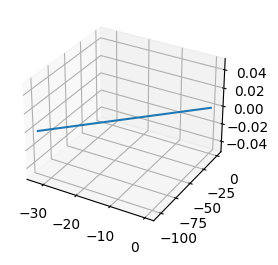

In [ ]:
# function that returns dy/dt
def modely(a1,a2,b1,d1,t,state):

    a1=1.22
    a2=5.1
    b1=0.2
    d1=0.1
    dxdt = x1*(1-x1) - (a1*x1*y1)/(1+b1*x1)
    dydt = (a1*x1*y1)/(1+b1*x1) - a2*x1*x1*y1*y1/((1+b1*x1)*(1+b1*x1)) - d1*y1
    return [dxdt,dydt]

#parameters
p = (a1,a2,b1,d1)
# initial condition
y0 = [0.1,0.1]

# time points
t_span = (0.0, 40.0)
t = np.arange(0.0, 40.0, 0.01)
# solve ODE
result_odeint = odeint(modely, y0,t,p, tfirst=True)
result_solve_ivp = solve_ivp(modely, t_span, y0, args=p)
# plot results
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result_odeint[:, 0],
        result_odeint[:, 1])
# plt.plot(t,y)
# plt.xlabel('time')
# plt.ylabel('y(t)')
# plt.show()


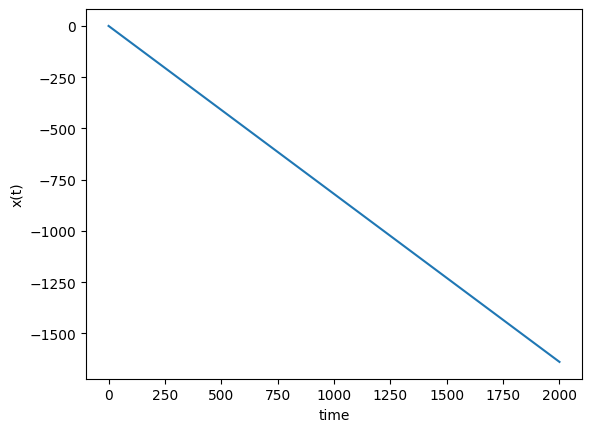

In [ ]:
# function that returns dy/dt
def modelx(x,t):
    a1=1.22
    a2=5.1
    b1=0.2
    d1=0.1
    dxdt = x1*(1-x1) - (a1*x1*y1)/(1+b1*x1)
    return dxdt

# initial condition
x0 = 0.1

# time points
t = np.linspace(0,2000)
# solve ODE
x = odeint(modelx,x0,t)
# plot results
plt.plot(t,x)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

In [ ]:
# function that returns dy/dt
model = []
for i in range(A1B1_Cond2.shape[0]):
    a1 = A1B1_Cond2.iloc[i]['a1']
    a2 = A1B1_Cond2.iloc[i]['a2']
    b1 = A1B1_Cond2.iloc[i]['b1']
    d1 = A1B1_Cond2.iloc[i]['d1']
    x1 = A1B1_Cond2.iloc[i]['x1']
    y1 = A1B1_Cond2.iloc[i]['y1']
    dxdt = x1*(1-x1) - (a1*x1*y1)/(1+b1*x1)
    dydt = (a1*x1*y1)/(1+b1*x1) - a2*x1*x1*y1*y1/((1+b1*x1)*(1+b1*x1)) - d1*y1
    dzdt = [dxdt,dydt]
    model.append(dzdt)


# # initial condition
# z0 = [0.1,0.1]

# # time points
# t = np.linspace(0,2000)
# # solve ODE
# z = odeint(modelz,z0,t)
# # plot results
# plt.plot(t,z)
# plt.xlabel('time')
# plt.ylabel('x(t)')
# plt.show()

In [ ]:
model = pd.DataFrame(model)
model.columns = ['dxdt','dydt']
model

dxdt          dydt
0     0.000000e+00 -1.734723e-17
1     3.469447e-18 -6.245005e-17
2     0.000000e+00  6.245005e-17
3     0.000000e+00  8.673617e-19
4    -1.387779e-17  1.318390e-16
...            ...           ...
1741 -2.775558e-17  3.504141e-16
1742 -1.387779e-17 -6.626644e-16
1743  0.000000e+00  2.949030e-16
1744  2.775558e-17  2.151057e-16
1745  0.000000e+00 -1.387779e-17

[1746 rows x 2 columns]

In [ ]:
model = model.sort_values('dxdt', ascending=True)

In [ ]:
figx = px.line(model, x="dxdt", y="dydt")
figx.show()

In [ ]:
# def model(z,t):
#     a1=1.22
#     a2=5.1
#     b1=0.2
#     d1=0.1
#     x = z[0]
#     y = z[1]
#     dxdt = x1*(1-x1) - (a1*x1*y1)/(1+b1*x1)
#     dydt = (a1*x1*y1)/(1+b1*x1) - a2*x1*x1*y1*y1/((1+b1*x1)*(1+b1*x1)) - d1*y1
#     dzdt = [dxdt,dydt]
#     return dzdt

# # initial condition
# z0 = [0,0]

# # number of time points
# n = 401

# # time points
# t = np.linspace(0,40,n)

# # step input
# u = np.zeros(n)
# # change to 2.0 at time = 5.0
# u[50:] = 2.0

# # store solution
# x = np.empty_like(t)
# y = np.empty_like(t)
# # record initial conditions
# x[0] = z0[0]
# y[0] = z0[1]

# # solve ODE
# for i in range(1,n):
#     # span for next time step
#     tspan = [t[i-1],t[i]]
#     # solve for next step
#     z = odeint(model,z0,tspan)
#     # store solution for plotting
#     x[i] = z[1][0]
#     y[i] = z[1][1]
#     # next initial condition
#     z0 = z[1]

# # plot results
# plt.plot(t,u,'g:',label='u(t)')
# plt.plot(t,x,'b-',label='x(t)')
# plt.plot(t,y,'r--',label='y(t)')
# plt.ylabel('values')
# plt.xlabel('time')
# plt.legend(loc='best')
# plt.show()

In [ ]:
# Z = pd.DataFrame(Z)
# Z.columns = ['z1','z2','z3']
# Z

In [ ]:
# Zcap = pd.DataFrame(Zcap)
# Zcap.columns = ['Z1','Z2','Z3']
# Zcap

In [ ]:
# ABZ = pd.concat([ABfinal,Z,Zcap], axis=1, join='inner')
# ABZ

In [ ]:
# TAN = []
# for i in range(len(ABZ)):
#   Z1 = ABZ.iloc[i]['Z1']
#   Z2 = ABZ.iloc[i]['Z2']
#   Z3 = ABZ.iloc[i]['Z3']
#   A1 = ABZ.iloc[i]['A1']
#   A2 = ABZ.iloc[i]['A2']
#   A3 = ABZ.iloc[i]['A3']
#   tan1 = math.atan(Z1/(-A1))
#   tan2 = math.atan(Z2/(-A2))
#   tan3 = math.atan(Z3/(-A3))
#   tan = [tan1,tan2,tan3]
#   TAN.append(tan)

In [ ]:
# TAN = pd.DataFrame(TAN)
# TAN.columns = ['tan1','tan2','tan3']
# TAN

In [ ]:
# Final = pd.concat([polynomial,ABZ,TAN], axis=1, join='inner')
# Final

In [ ]:
A_3B_3


a1      a2      b1      d1        x3        y3        A3        B3
0   0.7599  3.7721  1.7556  0.0037  0.005080  1.320954  0.003589  0.004695
1   1.0336  3.9867  1.4423  0.0480  0.066088  0.989678  0.000821  0.028039
2   0.4160  1.2877  1.7170  0.0023  0.005836  2.413765  0.003923  0.005362
3   1.0041  3.8353  1.7332  0.0343  0.043691  1.024525  0.017146  0.025325
4   0.1698  1.2283  2.3482  0.0008  0.006665  5.941587  0.008328  0.004339
5   1.2067  3.8801  1.7846  0.1038  0.227119  0.900093 -0.095428  0.001599
6   0.5878  1.5896  2.2209  0.0024  0.004202  1.709920  0.004958  0.004002
7   1.0049  3.5925  1.0276  0.0683  0.126647  0.982201 -0.070387  0.018754
8   0.8350  3.0623  0.1952  0.0124  0.016004  1.182120 -0.013861  0.013487
9   0.3388  1.2719  2.7811  0.0048  0.018712  3.047091  0.028602  0.012462
10  0.9545  3.7679  1.4744  0.0103  0.011516  1.053188  0.004479  0.010047
11  0.6440  3.3167  2.0395  0.0061  0.010558  1.569484  0.009743  0.008729
12  0.7820  3.6972  1.4040  0.0305  0.072182  1.306709 -0.007558  0.015819
13  0.6730  2.7693  1.3371  0.0226  0.050902  1.506233  0.000104  0.021740
14  0.7817  2.4796  0.5942  0.0303  0.049257  1.251849 -0.029330  0.028629
15  0.6580  3.3116  2.8275  0.0130  0.026439  1.590184  0.038092  0.015708
16  0.8419  2.9850  2.1888  0.0224  0.032946  1.231488  0.028628  0.021640
17  0.5713  1.2138  2.7455  0.0225  0.056884  1.908641  0.064903  0.030061
18  0.9495  3.2473  1.1489  0.0579  0.101280  1.056657 -0.035847  0.026732
19  0.9783  3.5717  0.0367  0.0773  0.157155  0.866510 -0.227884  0.004318
20  0.6921  2.9016  1.2315  0.0081  0.012881  1.448891  0.001857  0.010745
21  0.1550  1.3606  1.8639  0.0002  0.001405  6.459422  0.001186  0.001269
22  0.8645  3.9633  1.3466  0.0395  0.093156  1.180569 -0.024134  0.011491
23  0.5844  1.1349  1.4699  0.0330  0.086167  1.761766  0.004869  0.037476
24  0.9786  2.8842  1.9799  0.0694  0.147423  1.125516  0.002932  0.021740
25  0.6583  2.9264  2.0620  0.0119  0.022138  1.553244  0.018514  0.015338
26  0.8725  3.3338  1.9597  0.0312  0.049363  1.194955  0.026417  0.025043
27  0.8685  3.0841  1.2185  0.0184  0.024133  1.156665  0.001783  0.018310
28  1.0709  3.5447  2.9489  0.0587  0.096249  1.083445  0.081967  0.027340
29  0.7051  3.7920  0.6034  0.0233  0.060358  1.381171 -0.045102  0.013558
30  0.6043  2.7903  2.2428  0.0129  0.028953  1.711240  0.026728  0.016804
31  0.6434  1.9252  2.9799  0.0173  0.035312  1.657132  0.053277  0.021996

In [ ]:
# A_3B_3_Cond1 = Z3.loc[(Z3['A3'] > 0) & (Z3['B3'] < 0) & (Z3['Z3'] > 0)]
# A_3B_3_Cond1 = A_3B_3_Cond1.reset_index(drop=True)
# A_3B_3_Cond1

In [ ]:
A_3B_3_Cond1 = A_3B_3Z_3.loc[(A_3B_3Z_3['B3'] < 0) & (A_3B_3Z_3['Z3'] > 0)]
A_3B_3_Cond1 = A_3B_3_Cond1.reset_index(drop=True)
A_3B_3_Cond1

Empty DataFrame
Columns: [a1, a2, b1, d1, x3, y3, A3, B3, Z3]
Index: []

In [ ]:
A_3B_3_Cond2 = A_3B_3Z_3.loc[(A_3B_3Z_3['B3'] > 0) & (A_3B_3Z_3['Z3'] > 0)]
A_3B_3_Cond2 = A_3B_3_Cond2.reset_index(drop=True)
A_3B_3_Cond2

a1      a2      b1      d1        x3        y3        A3        B3  \
0  1.2067  3.8801  1.7846  0.1038  0.227119  0.900093 -0.095428  0.001599   
1  0.9783  3.5717  0.0367  0.0773  0.157155  0.866510 -0.227884  0.004318   

         Z3  
0  0.002710  
1  0.034657

In [ ]:
A_3B_3_Cond3 = A_3B_3Z_3.loc[(A_3B_3Z_3['B3'] > 0) & (A_3B_3Z_3['Z3'] < 0)]
A_3B_3_Cond3 = A_3B_3_Cond3.reset_index(drop=True)
A_3B_3_Cond3

a1      a2      b1      d1        x3        y3        A3        B3  \
0   0.7599  3.7721  1.7556  0.0037  0.005080  1.320954  0.003589  0.004695   
1   1.0336  3.9867  1.4423  0.0480  0.066088  0.989678  0.000821  0.028039   
2   0.4160  1.2877  1.7170  0.0023  0.005836  2.413765  0.003923  0.005362   
3   1.0041  3.8353  1.7332  0.0343  0.043691  1.024525  0.017146  0.025325   
4   0.1698  1.2283  2.3482  0.0008  0.006665  5.941587  0.008328  0.004339   
5   0.5878  1.5896  2.2209  0.0024  0.004202  1.709920  0.004958  0.004002   
6   1.0049  3.5925  1.0276  0.0683  0.126647  0.982201 -0.070387  0.018754   
7   0.8350  3.0623  0.1952  0.0124  0.016004  1.182120 -0.013861  0.013487   
8   0.3388  1.2719  2.7811  0.0048  0.018712  3.047091  0.028602  0.012462   
9   0.9545  3.7679  1.4744  0.0103  0.011516  1.053188  0.004479  0.010047   
10  0.6440  3.3167  2.0395  0.0061  0.010558  1.569484  0.009743  0.008729   
11  0.7820  3.6972  1.4040  0.0305  0.072182  1.306709 -0.007558  0.015819   
12  0.6730  2.7693  1.3371  0.0226  0.050902  1.506233  0.000104  0.021740   
13  0.7817  2.4796  0.5942  0.0303  0.049257  1.251849 -0.029330  0.028629   
14  0.6580  3.3116  2.8275  0.0130  0.026439  1.590184  0.038092  0.015708   
15  0.8419  2.9850  2.1888  0.0224  0.032946  1.231488  0.028628  0.021640   
16  0.5713  1.2138  2.7455  0.0225  0.056884  1.908641  0.064903  0.030061   
17  0.9495  3.2473  1.1489  0.0579  0.101280  1.056657 -0.035847  0.026732   
18  0.6921  2.9016  1.2315  0.0081  0.012881  1.448891  0.001857  0.010745   
19  0.1550  1.3606  1.8639  0.0002  0.001405  6.459422  0.001186  0.001269   
20  0.8645  3.9633  1.3466  0.0395  0.093156  1.180569 -0.024134  0.011491   
21  0.5844  1.1349  1.4699  0.0330  0.086167  1.761766  0.004869  0.037476   
22  0.9786  2.8842  1.9799  0.0694  0.147423  1.125516  0.002932  0.021740   
23  0.6583  2.9264  2.0620  0.0119  0.022138  1.553244  0.018514  0.015338   
24  0.8725  3.3338  1.9597  0.0312  0.049363  1.194955  0.026417  0.025043   
25  0.8685  3.0841  1.2185  0.0184  0.024133  1.156665  0.001783  0.018310   
26  1.0709  3.5447  2.9489  0.0587  0.096249  1.083445  0.081967  0.027340   
27  0.7051  3.7920  0.6034  0.0233  0.060358  1.381171 -0.045102  0.013558   
28  0.6043  2.7903  2.2428  0.0129  0.028953  1.711240  0.026728  0.016804   
29  0.6434  1.9252  2.9799  0.0173  0.035312  1.657132  0.053277  0.021996   

          Z3  
0  -0.018766  
1  -0.112156  
2  -0.021432  
3  -0.101005  
4  -0.017286  
5  -0.015984  
6  -0.070061  
7  -0.053756  
8  -0.049031  
9  -0.040167  
10 -0.034820  
11 -0.063219  
12 -0.086958  
13 -0.113654  
14 -0.061380  
15 -0.085739  
16 -0.116031  
17 -0.105641  
18 -0.042978  
19 -0.005077  
20 -0.045380  
21 -0.149882  
22 -0.086952  
23 -0.061009  
24 -0.099472  
25 -0.073236  
26 -0.102640  
27 -0.052197  
28 -0.066501  
29 -0.085147

In [ ]:
A_3B_3_Cond4 = A_3B_3Z_3.loc[A_3B_3Z_3['A3'] > 0 & (A_3B_3Z_3['B3'] > 0) & (A_3B_3Z_3['Z3'] > 0)]
A_3B_3_Cond4 = A_3B_3_Cond4.reset_index(drop=True)
A_3B_3_Cond4

a1      a2      b1      d1        x3        y3        A3        B3  \
0   0.7599  3.7721  1.7556  0.0037  0.005080  1.320954  0.003589  0.004695   
1   1.0336  3.9867  1.4423  0.0480  0.066088  0.989678  0.000821  0.028039   
2   0.4160  1.2877  1.7170  0.0023  0.005836  2.413765  0.003923  0.005362   
3   1.0041  3.8353  1.7332  0.0343  0.043691  1.024525  0.017146  0.025325   
4   0.1698  1.2283  2.3482  0.0008  0.006665  5.941587  0.008328  0.004339   
5   0.5878  1.5896  2.2209  0.0024  0.004202  1.709920  0.004958  0.004002   
6   0.3388  1.2719  2.7811  0.0048  0.018712  3.047091  0.028602  0.012462   
7   0.9545  3.7679  1.4744  0.0103  0.011516  1.053188  0.004479  0.010047   
8   0.6440  3.3167  2.0395  0.0061  0.010558  1.569484  0.009743  0.008729   
9   0.6730  2.7693  1.3371  0.0226  0.050902  1.506233  0.000104  0.021740   
10  0.6580  3.3116  2.8275  0.0130  0.026439  1.590184  0.038092  0.015708   
11  0.8419  2.9850  2.1888  0.0224  0.032946  1.231488  0.028628  0.021640   
12  0.5713  1.2138  2.7455  0.0225  0.056884  1.908641  0.064903  0.030061   
13  0.6921  2.9016  1.2315  0.0081  0.012881  1.448891  0.001857  0.010745   
14  0.1550  1.3606  1.8639  0.0002  0.001405  6.459422  0.001186  0.001269   
15  0.5844  1.1349  1.4699  0.0330  0.086167  1.761766  0.004869  0.037476   
16  0.9786  2.8842  1.9799  0.0694  0.147423  1.125516  0.002932  0.021740   
17  0.6583  2.9264  2.0620  0.0119  0.022138  1.553244  0.018514  0.015338   
18  0.8725  3.3338  1.9597  0.0312  0.049363  1.194955  0.026417  0.025043   
19  0.8685  3.0841  1.2185  0.0184  0.024133  1.156665  0.001783  0.018310   
20  1.0709  3.5447  2.9489  0.0587  0.096249  1.083445  0.081967  0.027340   
21  0.6043  2.7903  2.2428  0.0129  0.028953  1.711240  0.026728  0.016804   
22  0.6434  1.9252  2.9799  0.0173  0.035312  1.657132  0.053277  0.021996   

          Z3  
0  -0.018766  
1  -0.112156  
2  -0.021432  
3  -0.101005  
4  -0.017286  
5  -0.015984  
6  -0.049031  
7  -0.040167  
8  -0.034820  
9  -0.086958  
10 -0.061380  
11 -0.085739  
12 -0.116031  
13 -0.042978  
14 -0.005077  
15 -0.149882  
16 -0.086952  
17 -0.061009  
18 -0.099472  
19 -0.073236  
20 -0.102640  
21 -0.066501  
22 -0.085147

In [ ]:
A_3B_3_Cond5 = A_3B_3Z_3.loc[A_3B_3Z_3['A3'] < 0 & (A_3B_3Z_3['B3'] > 0) & (A_3B_3Z_3['Z3'] > 0)]
A_3B_3_Cond5 = A_3B_3_Cond5.reset_index(drop=True)
A_3B_3_Cond5

a1      a2      b1      d1        x3        y3        A3        B3  \
0  1.2067  3.8801  1.7846  0.1038  0.227119  0.900093 -0.095428  0.001599   
1  1.0049  3.5925  1.0276  0.0683  0.126647  0.982201 -0.070387  0.018754   
2  0.8350  3.0623  0.1952  0.0124  0.016004  1.182120 -0.013861  0.013487   
3  0.7820  3.6972  1.4040  0.0305  0.072182  1.306709 -0.007558  0.015819   
4  0.7817  2.4796  0.5942  0.0303  0.049257  1.251849 -0.029330  0.028629   
5  0.9495  3.2473  1.1489  0.0579  0.101280  1.056657 -0.035847  0.026732   
6  0.9783  3.5717  0.0367  0.0773  0.157155  0.866510 -0.227884  0.004318   
7  0.8645  3.9633  1.3466  0.0395  0.093156  1.180569 -0.024134  0.011491   
8  0.7051  3.7920  0.6034  0.0233  0.060358  1.381171 -0.045102  0.013558   

         Z3  
0  0.002710  
1 -0.070061  
2 -0.053756  
3 -0.063219  
4 -0.113654  
5 -0.105641  
6  0.034657  
7 -0.045380  
8 -0.052197

In [ ]:
A_3B_3_Cond6 = A_3B_3Z_3.loc[A_3B_3Z_3['A3'] > 0 & (A_3B_3Z_3['B3'] > 0) & (A_3B_3Z_3['Z3'] < 0)]
A_3B_3_Cond6 = A_3B_3_Cond6.reset_index(drop=True)
A_3B_3_Cond6

a1      a2      b1      d1        x3        y3        A3        B3  \
0   0.7599  3.7721  1.7556  0.0037  0.005080  1.320954  0.003589  0.004695   
1   1.0336  3.9867  1.4423  0.0480  0.066088  0.989678  0.000821  0.028039   
2   0.4160  1.2877  1.7170  0.0023  0.005836  2.413765  0.003923  0.005362   
3   1.0041  3.8353  1.7332  0.0343  0.043691  1.024525  0.017146  0.025325   
4   0.1698  1.2283  2.3482  0.0008  0.006665  5.941587  0.008328  0.004339   
5   0.5878  1.5896  2.2209  0.0024  0.004202  1.709920  0.004958  0.004002   
6   0.3388  1.2719  2.7811  0.0048  0.018712  3.047091  0.028602  0.012462   
7   0.9545  3.7679  1.4744  0.0103  0.011516  1.053188  0.004479  0.010047   
8   0.6440  3.3167  2.0395  0.0061  0.010558  1.569484  0.009743  0.008729   
9   0.6730  2.7693  1.3371  0.0226  0.050902  1.506233  0.000104  0.021740   
10  0.6580  3.3116  2.8275  0.0130  0.026439  1.590184  0.038092  0.015708   
11  0.8419  2.9850  2.1888  0.0224  0.032946  1.231488  0.028628  0.021640   
12  0.5713  1.2138  2.7455  0.0225  0.056884  1.908641  0.064903  0.030061   
13  0.6921  2.9016  1.2315  0.0081  0.012881  1.448891  0.001857  0.010745   
14  0.1550  1.3606  1.8639  0.0002  0.001405  6.459422  0.001186  0.001269   
15  0.5844  1.1349  1.4699  0.0330  0.086167  1.761766  0.004869  0.037476   
16  0.9786  2.8842  1.9799  0.0694  0.147423  1.125516  0.002932  0.021740   
17  0.6583  2.9264  2.0620  0.0119  0.022138  1.553244  0.018514  0.015338   
18  0.8725  3.3338  1.9597  0.0312  0.049363  1.194955  0.026417  0.025043   
19  0.8685  3.0841  1.2185  0.0184  0.024133  1.156665  0.001783  0.018310   
20  1.0709  3.5447  2.9489  0.0587  0.096249  1.083445  0.081967  0.027340   
21  0.6043  2.7903  2.2428  0.0129  0.028953  1.711240  0.026728  0.016804   
22  0.6434  1.9252  2.9799  0.0173  0.035312  1.657132  0.053277  0.021996   

          Z3  
0  -0.018766  
1  -0.112156  
2  -0.021432  
3  -0.101005  
4  -0.017286  
5  -0.015984  
6  -0.049031  
7  -0.040167  
8  -0.034820  
9  -0.086958  
10 -0.061380  
11 -0.085739  
12 -0.116031  
13 -0.042978  
14 -0.005077  
15 -0.149882  
16 -0.086952  
17 -0.061009  
18 -0.099472  
19 -0.073236  
20 -0.102640  
21 -0.066501  
22 -0.085147

In [ ]:
A_3B_3_Cond7 = A_3B_3Z_3.loc[A_3B_3Z_3['A3'] < 0 & (A_3B_3Z_3['B3'] > 0) & (A_3B_3Z_3['Z3'] < 0)]
A_3B_3_Cond7 = A_3B_3_Cond7.reset_index(drop=True)
A_3B_3_Cond7

a1      a2      b1      d1        x3        y3        A3        B3  \
0  1.2067  3.8801  1.7846  0.1038  0.227119  0.900093 -0.095428  0.001599   
1  1.0049  3.5925  1.0276  0.0683  0.126647  0.982201 -0.070387  0.018754   
2  0.8350  3.0623  0.1952  0.0124  0.016004  1.182120 -0.013861  0.013487   
3  0.7820  3.6972  1.4040  0.0305  0.072182  1.306709 -0.007558  0.015819   
4  0.7817  2.4796  0.5942  0.0303  0.049257  1.251849 -0.029330  0.028629   
5  0.9495  3.2473  1.1489  0.0579  0.101280  1.056657 -0.035847  0.026732   
6  0.9783  3.5717  0.0367  0.0773  0.157155  0.866510 -0.227884  0.004318   
7  0.8645  3.9633  1.3466  0.0395  0.093156  1.180569 -0.024134  0.011491   
8  0.7051  3.7920  0.6034  0.0233  0.060358  1.381171 -0.045102  0.013558   

         Z3  
0  0.002710  
1 -0.070061  
2 -0.053756  
3 -0.063219  
4 -0.113654  
5 -0.105641  
6  0.034657  
7 -0.045380  
8 -0.052197

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
with pd.ExcelWriter("drive/My Drive/Colab/A3B3.xlsx") as excel_writer:
    A_3B_3Z_3.to_excel(excel_writer, sheet_name='Sheet1', index=False)
    A_3B_3_Cond1.to_excel(excel_writer, sheet_name='Sheet2', index=False)
    A_3B_3_Cond2.to_excel(excel_writer, sheet_name='Sheet3', index=False)
    A_3B_3_Cond3.to_excel(excel_writer, sheet_name='Sheet4', index=False)
    A_3B_3_Cond4.to_excel(excel_writer, sheet_name='Sheet5', index=False)
    A_3B_3_Cond5.to_excel(excel_writer, sheet_name='Sheet6', index=False)
    A_3B_3_Cond6.to_excel(excel_writer, sheet_name='Sheet7', index=False)
    A_3B_3_Cond7.to_excel(excel_writer, sheet_name='Sheet8', index=False)
    XYcoeffspos.to_excel(excel_writer, sheet_name ='3 equilibrium', index = False)

OSError: ignored